In [77]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

import models
import selection_functions

In [78]:
plt.style.use("ggplot")

In [79]:
# payoffs
T, R, P, S, M, epsilon = sym.symbols("T, R, P, S, M, epsilon", real=True, nonenegative=True)

# share of population with genotype at "start" of time t
x1, x2, x3, x4 = sym.symbols("x1, x2, x3, x4", real=True, nonnegative=True)

# share of population carrying G (A) allele of gamma (alpha) gene at the "start" of time t
xG = x1 + x2
xA = x1 + x3

# fecundity of female carrying G (g) allele of the gamma gene
FG = sym.Function('FG')
Fg = sym.Function('Fg')
LG = sym.Function('LG')
Lg = sym.Function('Lg')


In [80]:
x = np.array([[x1], [x2], [x3], [1 - x1 - x2 - x3]])
payoff_kernel = np.array([[R, S], [T, P]])
UGA = selection_functions.UGA
UgA = selection_functions.UgA
W = models.generalized_sexual_selection(x, UGA, UgA, payoff_kernel, 0, 0, epsilon, incumbent_only=True)
(_offspring_1,), (_offspring_2,), (_offspring_3,), _ = models._offspring_by_genotype(W, x)

In [41]:
# summing across males yields fecundity i,j where fecundity i,j is the total number of offspring with genotype i produced by female with genotype j 
fitness = W.sum(axis=2)

# total number of offspring produced by a female with genotype j is the column sum
fecundity = partial_fecundities.sum(axis=0)

# total number of offspring with genotype i is the row sum
total_fitness = partial_fecundities.sum(axis=1)

In [49]:
sym.simplify(fecundities[0,0].subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

2*(M - R)*(epsilon - 1)

In [50]:
sym.simplify(fecundities[1,1].subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

-1.0*M + 1.0*R

In [56]:
sym.simplify((fecundities[2,2] - fecundities[0,3] - fecundities[1,3] - fecundities[2,3]).subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

-0.25*epsilon*Fg(x1) - 0.25*epsilon*Lg(x1) - 0.25*Fg(x1)

In [52]:
sym.simplify(fecundities[0,3].subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

0.25*epsilon*(Fg(x1) - Lg(x1)) + 0.25*Lg(x1)

In [53]:
sym.simplify(fecundities[1,3].subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

-(0.25*epsilon - 0.5)*(Fg(x1) - Lg(x1)) + 0.25*Lg(x1)

In [54]:
sym.simplify(fecundities[2,3].subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

0.25*epsilon*(Fg(x1) - Lg(x1)) + 0.25*Lg(x1)

In [59]:
sym.simplify(sym.diff(fecundities[2,0], x3).subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

1.0*(M - R)*(epsilon - 1)/x1

In [60]:
sym.simplify(sym.diff(fecundities[2,1], x3).subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

0.5*(-M + R)/x1

In [67]:
sym.simplify(sym.diff(fecundities[1,0], x2).subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

0

In [73]:
sym.diff(fecundities[0,1].subs(_subs), x1).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)})

0.5*Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1)

In [61]:
sym.simplify((sym.diff(fecundities[1,1], x2) - sym.diff(fecundities[1,3], x2)).subs(_subs).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

-(0.25*epsilon - 0.5)*(Fg(x1) - Lg(x1))/(x1 - 1)

In [99]:
sym.simplify((sym.diff(fecundities[0,0].subs(_subs), x1) - sym.diff(fecundities[0,3].subs(_subs), x1)).subs({x2: 1 - x1, x3: 0}).subs({FG(x1): 2*(R-M), LG(x1): 2*(R-M)}))

(0.25*epsilon*(Fg(x1) - Lg(x1)) + (x1 - 1)*(-0.25*epsilon*(Derivative(Fg(x1), x1) - Derivative(Lg(x1), x1)) - (epsilon - 1)*Derivative(LG(x1), x1) + 0.5*Derivative(FG(x1), x1) - 0.5*Derivative(LG(x1), x1) - 0.25*Derivative(Lg(x1), x1)))/(x1 - 1)

In [80]:
fecundity_by_genotype.shape

(4, 4)

In [22]:
str((_offspring_1))

'x1*(x1*(1 - epsilon)*(2*R*UGA(x1 + x3) + 2*S*(1 - UGA(x1 + x3)))*UGA(x1 + x3)/(x1 + x3) + 0.5*x2*(1 - UGA(x1 + x3))*(2*P*(1 - UGA(x1 + x3)) + 2*T*UGA(x1 + x3))/(-x1 - x3 + 1) + x3*(0.5 - 0.5*epsilon)*(2*R*UGA(x1 + x3) + 2*S*(1 - UGA(x1 + x3)))*UGA(x1 + x3)/(x1 + x3) + 0.25*(1 - UGA(x1 + x3))*(2*P*(1 - UGA(x1 + x3)) + 2*T*UGA(x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1)) + x2*(0.25*epsilon*(1 - UGA(x1 + x3))*(2*P*(1 - UGA(x1 + x3)) + 2*T*UGA(x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1) + 0.5*x1*(2*R*UGA(x1 + x3) + 2*S*(1 - UGA(x1 + x3)))*UGA(x1 + x3)/(x1 + x3) + 0.25*x3*(2*R*UGA(x1 + x3) + 2*S*(1 - UGA(x1 + x3)))*UGA(x1 + x3)/(x1 + x3)) + x3*(x1*(0.5 - 0.5*epsilon)*(2*R*UgA(x1 + x3) + 2*S*(1 - UgA(x1 + x3)))*UgA(x1 + x3)/(x1 + x3) + 0.25*x2*(1 - UgA(x1 + x3))*(2*P*(1 - UgA(x1 + x3)) + 2*T*UgA(x1 + x3))/(-x1 - x3 + 1)) + (0.25*epsilon*x2*(1 - UgA(x1 + x3))*(2*P*(1 - UgA(x1 + x3)) + 2*T*UgA(x1 + x3))/(-x1 - x3 + 1) + 0.25*x1*(2*R*UgA(x1 + x3) + 2*S*(1 - UgA(x1 + x3)))*UgA(x1 + x3)/(x1 + 

In [81]:
_subs = {
    (2*R*UGA(x1 + x3) + 2*S*(1 - UGA(x1 + x3)))*UGA(x1 + x3): LG(xA),
    (1 - UGA(x1 + x3))*(2*P*(1 - UGA(x1 + x3)) + 2*T*UGA(x1 + x3)): FG(xA) - LG(xA),
    (1 - UgA(x1 + x3))*(2*P*(1 - UgA(x1 + x3)) + 2*T*UgA(x1 + x3)): Fg(xA) - Lg(xA),
    (2*R*UgA(x1 + x3) + 2*S*(1 - UgA(x1 + x3)))*UgA(x1 + x3): Lg(xA),
}

offspring_1 = _offspring_1.subs(_subs)
offspring_2 = _offspring_2.subs(_subs)
offspring_3 = _offspring_3.subs(_subs)

In [11]:
offspring_1

x1*(x1*(1 - epsilon)*LG(x1 + x3)/(x1 + x3) + 0.5*x2*(FG(x1 + x3) - LG(x1 + x3))/(-x1 - x3 + 1) + x3*(0.5 - 0.5*epsilon)*LG(x1 + x3)/(x1 + x3) + 0.25*(FG(x1 + x3) - LG(x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1)) + x2*(0.25*epsilon*(FG(x1 + x3) - LG(x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1) + 0.5*x1*LG(x1 + x3)/(x1 + x3) + 0.25*x3*LG(x1 + x3)/(x1 + x3)) + x3*(x1*(0.5 - 0.5*epsilon)*Lg(x1 + x3)/(x1 + x3) + 0.25*x2*(Fg(x1 + x3) - Lg(x1 + x3))/(-x1 - x3 + 1)) + (0.25*epsilon*x2*(Fg(x1 + x3) - Lg(x1 + x3))/(-x1 - x3 + 1) + 0.25*x1*Lg(x1 + x3)/(x1 + x3))*(-x1 - x2 - x3 + 1)

In [15]:
sym.diff(offspring_1, x3)#.subs({x2: 1 - x1, x3: 0})

-0.25*epsilon*x2*(Fg(x1 + x3) - Lg(x1 + x3))/(-x1 - x3 + 1) + x1*(0.5 - 0.5*epsilon)*Lg(x1 + x3)/(x1 + x3) + x1*(x1*(1 - epsilon)*Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3)/(x1 + x3) - x1*(1 - epsilon)*LG(x1 + x3)/(x1 + x3)**2 + 0.5*x2*(FG(x1 + x3) - LG(x1 + x3))/(-x1 - x3 + 1)**2 + 0.5*x2*(Subs(Derivative(FG(_xi_1), _xi_1), _xi_1, x1 + x3) - Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3))/(-x1 - x3 + 1) + x3*(0.5 - 0.5*epsilon)*Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3)/(x1 + x3) - x3*(0.5 - 0.5*epsilon)*LG(x1 + x3)/(x1 + x3)**2 + (0.5 - 0.5*epsilon)*LG(x1 + x3)/(x1 + x3) - 0.25*(FG(x1 + x3) - LG(x1 + x3))/(-x1 - x3 + 1) + 0.25*(FG(x1 + x3) - LG(x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1)**2 + 0.25*(Subs(Derivative(FG(_xi_1), _xi_1), _xi_1, x1 + x3) - Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1)) - 0.25*x1*Lg(x1 + x3)/(x1 + x3) + 0.25*x2*(Fg(x1 + x3) - Lg(x1 + x3))/(-x1 - x3 + 1) + x2*(-0.25*epsilon*(FG(x1 + x3) - LG(x1 + 

In [14]:
sym.diff(offspring_3, x1)#.subs({x2: 1 - x1, x3: 0}))

-0.25*epsilon*x2*(Fg(x1 + x3) - Lg(x1 + x3))/(-x1 - x3 + 1) + x1*(x3*(0.5 - 0.5*epsilon)*Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3)/(x1 + x3) - x3*(0.5 - 0.5*epsilon)*LG(x1 + x3)/(x1 + x3)**2 - 0.25*(FG(x1 + x3) - LG(x1 + x3))/(-x1 - x3 + 1) + 0.25*(FG(x1 + x3) - LG(x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1)**2 + 0.25*(Subs(Derivative(FG(_xi_1), _xi_1), _xi_1, x1 + x3) - Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1)) - 0.25*x1*Lg(x1 + x3)/(x1 + x3) + x2*(-0.25*epsilon*(FG(x1 + x3) - LG(x1 + x3))/(-x1 - x3 + 1) + 0.25*epsilon*(FG(x1 + x3) - LG(x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1)**2 + 0.25*epsilon*(Subs(Derivative(FG(_xi_1), _xi_1), _xi_1, x1 + x3) - Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3))*(-x1 - x2 - x3 + 1)/(-x1 - x3 + 1) + 0.25*x3*Subs(Derivative(LG(_xi_1), _xi_1), _xi_1, x1 + x3)/(x1 + x3) - 0.25*x3*LG(x1 + x3)/(x1 + x3)**2) + x3*(0.5 - 0.5*epsilon)*LG(x1 + x3)/(x1 + x3) + x3*(x1*(0.5 - 0.5*epsilon)*Subs(Derivati

In [23]:
sym.simplify(sym.diff(offspring_3, x2) - sym.diff(offspring_3, x1)).doit().subs({x2: 1 - x1, x3: 0})

(-0.25*epsilon*x1**2*(1 - x1)*(x1 - 1)*(FG(x1) - LG(x1)) - 0.25*x1**3*(x1 - 1)*(FG(x1) - LG(x1)) + 0.25*x1**2*(x1 - 1)*(epsilon*(1 - x1)*(FG(x1) - LG(x1)) + x1*(FG(x1) - LG(x1))))/(x1**2*(x1 - 1)**2)

In [82]:
# expression for total number of offspring (population after matching and mating)
total_offspring = xG * FG(xA) + (1 - xG) * Fg(xA)

In [45]:
N, = models.total_offspring(W, x)

In [46]:
# doesn't depend on epsilon
sym.simplify(N)

2.0*P*x1*UGA(x1 + x3)**2 - 4.0*P*x1*UGA(x1 + x3) - 2.0*P*x1*UgA(x1 + x3)**2 + 4.0*P*x1*UgA(x1 + x3) + 2.0*P*x2*UGA(x1 + x3)**2 - 4.0*P*x2*UGA(x1 + x3) - 2.0*P*x2*UgA(x1 + x3)**2 + 4.0*P*x2*UgA(x1 + x3) + 2.0*P*UgA(x1 + x3)**2 - 4.0*P*UgA(x1 + x3) + 2.0*P + 2.0*R*x1*UGA(x1 + x3)**2 - 2.0*R*x1*UgA(x1 + x3)**2 + 2.0*R*x2*UGA(x1 + x3)**2 - 2.0*R*x2*UgA(x1 + x3)**2 + 2.0*R*UgA(x1 + x3)**2 - 2.0*S*x1*UGA(x1 + x3)**2 + 2.0*S*x1*UGA(x1 + x3) + 2.0*S*x1*UgA(x1 + x3)**2 - 2.0*S*x1*UgA(x1 + x3) - 2.0*S*x2*UGA(x1 + x3)**2 + 2.0*S*x2*UGA(x1 + x3) + 2.0*S*x2*UgA(x1 + x3)**2 - 2.0*S*x2*UgA(x1 + x3) - 2.0*S*UgA(x1 + x3)**2 + 2.0*S*UgA(x1 + x3) - 2.0*T*x1*UGA(x1 + x3)**2 + 2.0*T*x1*UGA(x1 + x3) + 2.0*T*x1*UgA(x1 + x3)**2 - 2.0*T*x1*UgA(x1 + x3) - 2.0*T*x2*UGA(x1 + x3)**2 + 2.0*T*x2*UGA(x1 + x3) + 2.0*T*x2*UgA(x1 + x3)**2 - 2.0*T*x2*UgA(x1 + x3) - 2.0*T*UgA(x1 + x3)**2 + 2.0*T*UgA(x1 + x3)

In [29]:
total_offspring

(x1 + x2)*FG(x1 + x3) + (-x1 - x2 + 1)*Fg(x1 + x3)

In [83]:
f1 = (offspring_1 / total_offspring) - x1
f2 = (offspring_2 / total_offspring) - x2
f3 = (offspring_3 / total_offspring) - x3

In [55]:
f1.subs({x2:1-x1, x3:0})

-x1 + (x1*((1 - epsilon)*LG(x1) + 0.5*FG(x1) - 0.5*LG(x1)) + 0.5*(1 - x1)*LG(x1))/FG(x1)

In [84]:
x = np.array([[x1], [1 - x1], [0], [0]])
_W = models.generalized_sexual_selection(x, UGA, UgA, payoff_kernel, 0, 0, epsilon)
(_f1,), *_ = models.offspring_genotypes_evolution(_W, x)

In [57]:
sym.factor(sym.simplify(_f1), UGA(x1), x1, epsilon)

-1.0*(0.5*P*epsilon*x1 - 0.5*P*epsilon + 0.25*P*x1 - 0.25*S*UGA(x1) + epsilon*x1*(-1.0*P + 0.5*S + 0.5*T)*UGA(x1) + epsilon*x1*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1)**2 + epsilon*(-0.5*P + 0.5*T)*UGA(x1)**2 + epsilon*(1.0*P - 0.5*T)*UGA(x1) + x1*(-0.5*P + 0.25*S + 0.25*T)*UGA(x1) + x1*(0.25*P + 0.25*R - 0.25*S - 0.25*T)*UGA(x1)**2 + (-0.25*R + 0.25*S)*UGA(x1)**2)/(0.5*P + (-1.0*P + 0.5*S + 0.5*T)*UGA(x1) + (0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1)**2)

In [58]:
sym.simplify(f1.subs({x2: 1 - x1, x3: 0}))

(-1.0*epsilon*x1*LG(x1) - 0.5*x1*FG(x1) + 0.5*LG(x1))/FG(x1)

In [85]:
F = sym.Matrix([[f1],
                [f2],
                [f3]])
F_jac = F.jacobian([x1, x2, x3])

In [86]:
FG_star = sym.symbols("F_G^*", positive=True, real=True)
Fg_star = sym.symbols("F_g^*", positive=True, real=True)
LG_star = sym.symbols("L_G^*", positive=True, real=True)
Lg_star = sym.symbols("L_g^*", positive=True, real=True)
FG_prime_star = sym.symbols("F_G^{'*}", positive=True, real=True)
LG_prime_star = sym.symbols("L_G^{'*}", positive=True, real=True)

_x1_star, = sym.solve(sym.simplify(f1.subs({x2: 1 - x1, x3: 0})), x1, implicit=True)
x1_star = _x1_star.subs({FG(x1): FG_star, LG(x1): LG_star})

evaluated_F_jac = sym.simplify(F_jac.subs({x2: 1 - x1, x3: 0})
                                    .doit()
                                    .subs({sym.Derivative(FG(x1), x1): FG_prime_star, sym.Derivative(LG(x1), x1): LG_prime_star})
                                    .subs({FG(x1): FG_star, Fg(x1): Fg_star, LG(x1): LG_star, Lg(x1): Lg_star})
                                    .subs({x1: x1_star}))
           

In [97]:
sym.factor(sym.together(sym.expand(evaluated_F_jac[0,0])))

-1.125*(0.0555555555555556*F_G^***3*epsilon + 0.111111111111111*F_G^***3 + 0.0555555555555556*F_G^***2*F_g^**epsilon + 0.222222222222222*F_G^***2*L_G^**epsilon**2 + 0.555555555555556*F_G^***2*L_G^**epsilon - 0.0555555555555556*F_G^***2*L_G^* - 0.111111111111111*F_G^***2*L_G^{'*} - 0.0555555555555556*F_G^***2*L_g^**epsilon + 0.0555555555555556*F_G^***2*L_g^* + 0.111111111111111*F_G^**F_G^{'*}*L_G^* + 0.222222222222222*F_G^**F_g^**L_G^**epsilon**2 - 0.0555555555555556*F_G^**F_g^**L_G^**epsilon - 0.222222222222222*F_G^**F_g^**L_G^* + 0.222222222222222*F_G^**L_G^***2*epsilon**3 + 1.0*F_G^**L_G^***2*epsilon**2 - 0.5*F_G^**L_G^***2*epsilon - 0.0555555555555556*F_G^**L_G^***2 - 0.222222222222222*F_G^**L_G^**L_G^{'*}*epsilon + 0.111111111111111*F_G^**L_G^**L_G^{'*} - 0.222222222222222*F_G^**L_G^**L_g^**epsilon**2 + 0.277777777777778*F_G^**L_G^**L_g^**epsilon - 0.0555555555555556*F_G^**L_G^**L_g^* + 0.222222222222222*F_G^{'*}*L_G^***2*epsilon - 0.111111111111111*F_G^{'*}*L_G^***2 + 0.2222222222

In [62]:
sym.simplify(x1_star)

L_G^*/(F_G^* + 2.0*L_G^**epsilon)

In [17]:
eigenvals = evaluated_F_jac.eigenvals()

In [18]:
e1, e2, e3 = eigenvals.keys()

In [19]:
e1.subs({epsilon: 0})

-(F_G^***2 - F_G^**L_G^{'*} + F_G^{'*}*L_G^*)/(2*F_G^***2)

In [88]:
(sym.simplify(e2))

(-F_G^***2*epsilon - 5*F_G^***2 - F_G^**F_g^**epsilon + 3*F_G^**F_g^* - 2*F_G^**L_G^**epsilon**2 - 8*F_G^**L_G^**epsilon + 5*F_G^**L_G^* - F_G^**L_g^**epsilon - 2*F_g^**L_G^**epsilon**2 + 7*F_g^**L_G^**epsilon - 3*F_g^**L_G^* + 2*L_G^***2*epsilon**2 - 3*L_G^***2*epsilon - 2*L_G^**L_g^**epsilon**2 + L_G^**L_g^**epsilon - sqrt(F_G^***4*epsilon**2 + 2*F_G^***4*epsilon + F_G^***4 + 2*F_G^***3*F_g^**epsilon**2 + 4*F_G^***3*F_g^**epsilon + 2*F_G^***3*F_g^* + 4*F_G^***3*L_G^**epsilon**3 + 20*F_G^***3*L_G^**epsilon**2 - 2*F_G^***3*L_G^**epsilon - 2*F_G^***3*L_G^* + 2*F_G^***3*L_g^**epsilon**2 + 2*F_G^***3*L_g^**epsilon + F_G^***2*F_g^***2*epsilon**2 + 2*F_G^***2*F_g^***2*epsilon + F_G^***2*F_g^***2 + 8*F_G^***2*F_g^**L_G^**epsilon**3 + 26*F_G^***2*F_g^**L_G^**epsilon**2 - 2*F_G^***2*F_g^**L_G^**epsilon - 4*F_G^***2*F_g^**L_G^* + 2*F_G^***2*F_g^**L_g^**epsilon**2 + 2*F_G^***2*F_g^**L_g^**epsilon + 4*F_G^***2*L_G^***2*epsilon**4 + 60*F_G^***2*L_G^***2*epsilon**3 - 50*F_G^***2*L_G^***2*epsilon**2

In [42]:
A, B = sym.symbols("A, B", real=True, positive=True)
C, D = sym.symbols("C, D", real=True, nonnegative=True)

Real = (-A**2*epsilon - 
        5*A**2 - 
        A*B*epsilon + 
        3*A*B - 
        2*A*C*epsilon**2 - 
        8*A*C*epsilon + 
        5*A*C - 
        A*D*epsilon - 
        2*B*C*epsilon**2 + 
        7*B*C*epsilon - 
        3*B*C + 
        2*C**2*epsilon**2 - 
        3*C**2*epsilon - 
        2*C*D*epsilon**2 + 
        C*D*epsilon)

Delta = (A**4*epsilon**2 + 
         2*A**4*epsilon + 
         A**4 + 
         2*A**3*B*epsilon**2 + 
         4*A**3*B*epsilon + 
         2*A**3*B + 
         4*A**3*C*epsilon**3 + 
         20*A**3*C*epsilon**2 - 
         2*A**3*C*epsilon - 
         2*A**3*C + 
         2*A**3*D*epsilon**2 + 
         2*A**3*D*epsilon + 
         A**2*B**2*epsilon**2 + 
         2*A**2*B**2*epsilon + 
         A**2*B**2 + 
         8*A**2*B*C*epsilon**3 + 
         26*A**2*B*C*epsilon**2 - 
         2*A**2*B*C*epsilon - 
         4*A**2*B*C + 
         2*A**2*B*D*epsilon**2 + 
         2*A**2*B*D*epsilon + 
         4*A**2*C**2*epsilon**4 + 
         60*A**2*C**2*epsilon**3 - 
         50*A**2*C**2*epsilon**2 + 
         6*A**2*C**2*epsilon + 
         A**2*C**2 + 
         8*A**2*C*D*epsilon**3 - 
         14*A**2*C*D*epsilon**2 + 
         12*A**2*C*D*epsilon + 
         A**2*D**2*epsilon**2 + 
         4*A*B**2*C*epsilon**3 + 6*A*B**2*C*epsilon**2 - 2*A*B**2*C + 8*A*B*C**2*epsilon**4 + 64*A*B*C**2*epsilon**3 - 38*A*B*C**2*epsilon**2 - 12*A*B*C**2*epsilon + 2*A*B*C**2 + 8*A*B*C*D*epsilon**3 + 4*A*B*C*D*epsilon**2 - 4*A*B*C*D*epsilon + 56*A*C**3*epsilon**4 - 116*A*C**3*epsilon**3 + 52*A*C**3*epsilon**2 - 6*A*C**3*epsilon + 8*A*C**2*D*epsilon**4 - 72*A*C**2*D*epsilon**3 + 66*A*C**2*D*epsilon**2 - 14*A*C**2*D*epsilon + 4*A*C*D**2*epsilon**3 - 2*A*C*D**2*epsilon**2 + 4*B**2*C**2*epsilon**4 + 4*B**2*C**2*epsilon**3 - 3*B**2*C**2*epsilon**2 - 2*B**2*C**2*epsilon + B**2*C**2 + 56*B*C**3*epsilon**4 - 56*B*C**3*epsilon**3 - 6*B*C**3*epsilon**2 + 10*B*C**3*epsilon + 8*B*C**2*D*epsilon**4 - 6*B*C**2*D*epsilon**2 + 2*B*C**2*D*epsilon - 60*C**4*epsilon**4 + 52*C**4*epsilon**3 - 7*C**4*epsilon**2 - 72*C**3*D*epsilon**4 + 80*C**3*D*epsilon**3 - 22*C**3*D*epsilon**2 + 4*C**2*D**2*epsilon**4 - 4*C**2*D**2*epsilon**3 + C**2*D**2*epsilon**2)



In [89]:
# prove that this is negative and equilibrium is not invadable
n, d = sym.fraction(sym.factor(sym.together(sym.expand((Delta / (8*A*(A + 2*C*epsilon - C))**2) - (-Real / (8*A*(A + 2*C*epsilon - C)))**2))))

In [90]:
# this is strictly positive
d

8*A**2*(A + 2*C*epsilon - C)

In [91]:
n

-A**3*epsilon - 3*A**3 + 4*A**2*B - 4*A**2*C*epsilon + 3*A**2*C - A**2*D*epsilon + A*B**2*epsilon - A*B**2 + 2*A*B*C*epsilon**2 + 7*A*B*C*epsilon - 4*A*B*C + A*B*D*epsilon + 4*A*C**2*epsilon**3 - 2*A*C**2*epsilon**2 - 3*A*C**2*epsilon - 4*A*C*D*epsilon**2 + 3*A*C*D*epsilon + 2*B**2*C*epsilon**2 - 3*B**2*C*epsilon + B**2*C + 4*B*C**2*epsilon**3 - 4*B*C**2*epsilon**2 + B*C**2*epsilon + 2*B*C*D*epsilon**2 - B*C*D*epsilon - 4*C**3*epsilon**3 + 2*C**3*epsilon**2 - 4*C**2*D*epsilon**3 + 2*C**2*D*epsilon**2

In [92]:
# need to show where this is negative
pb = sym.Poly(n, B)

In [93]:
# this is negative so quadratic opens down (so intermediate values of Fg can invade)
sym.factor(pb.coeffs()[0])

(epsilon - 1)*(A + 2*C*epsilon - C)

In [94]:
sym.factor(pb.coeffs()[1])

(A + 2*C*epsilon - C)*(4*A + 2*C*epsilon**2 - C*epsilon + D*epsilon)

In [95]:
# if this is negative then both roots are positive (both roots negative is infeasible)
sym.factor(pb.coeffs()[2], D)

-A**3*epsilon - 3*A**3 - 4*A**2*C*epsilon + 3*A**2*C + 4*A*C**2*epsilon**3 - 2*A*C**2*epsilon**2 - 3*A*C**2*epsilon - 4*C**3*epsilon**3 + 2*C**3*epsilon**2 - D*(A**2*epsilon + 4*A*C*epsilon**2 - 3*A*C*epsilon + 4*C**2*epsilon**3 - 2*C**2*epsilon**2)

In [96]:
Fg_lower, Fg_upper = sym.solve(pb, B)

In [97]:
str(Fg_lower)

'(sqrt((A + 2*C*epsilon - C)*(4*A**3*epsilon**2 + 8*A**3*epsilon + 4*A**3 + 32*A**2*C*epsilon**2 - 4*A**2*C*epsilon - 4*A**2*C + 4*A**2*D*epsilon**2 + 4*A**2*D*epsilon - 12*A*C**2*epsilon**4 + 52*A*C**2*epsilon**3 - 27*A*C**2*epsilon**2 - 4*A*C**2*epsilon + 20*A*C*D*epsilon**3 - 14*A*C*D*epsilon**2 + 4*A*C*D*epsilon + A*D**2*epsilon**2 + 8*C**3*epsilon**5 + 4*C**3*epsilon**4 - 18*C**3*epsilon**3 + 7*C**3*epsilon**2 + 24*C**2*D*epsilon**4 - 32*C**2*D*epsilon**3 + 10*C**2*D*epsilon**2 + 2*C*D**2*epsilon**3 - C*D**2*epsilon**2))*(1 - epsilon) + (-4*A - 2*C*epsilon**2 + C*epsilon - D*epsilon)*(A*epsilon - A + 2*C*epsilon**2 - 3*C*epsilon + C))/(2*(epsilon - 1)*(A*epsilon - A + 2*C*epsilon**2 - 3*C*epsilon + C))'

In [98]:
str(Fg_upper)

'(sqrt((A + 2*C*epsilon - C)*(4*A**3*epsilon**2 + 8*A**3*epsilon + 4*A**3 + 32*A**2*C*epsilon**2 - 4*A**2*C*epsilon - 4*A**2*C + 4*A**2*D*epsilon**2 + 4*A**2*D*epsilon - 12*A*C**2*epsilon**4 + 52*A*C**2*epsilon**3 - 27*A*C**2*epsilon**2 - 4*A*C**2*epsilon + 20*A*C*D*epsilon**3 - 14*A*C*D*epsilon**2 + 4*A*C*D*epsilon + A*D**2*epsilon**2 + 8*C**3*epsilon**5 + 4*C**3*epsilon**4 - 18*C**3*epsilon**3 + 7*C**3*epsilon**2 + 24*C**2*D*epsilon**4 - 32*C**2*D*epsilon**3 + 10*C**2*D*epsilon**2 + 2*C*D**2*epsilon**3 - C*D**2*epsilon**2))*(epsilon - 1) + (-4*A - 2*C*epsilon**2 + C*epsilon - D*epsilon)*(A*epsilon - A + 2*C*epsilon**2 - 3*C*epsilon + C))/(2*(epsilon - 1)*(A*epsilon - A + 2*C*epsilon**2 - 3*C*epsilon + C))'

## Case where $U_G=1; U_g=x^*$

If discriminant is negative, then quadratic is everywhere negative and equilibrium is globally uninvadable. Can show that discriminant is positive and thus this equilibrium is invadable for some $F_g$.

In [99]:
_Fg_star = 2 * ((R + P - T - S) * (1 / (2*epsilon + 1))**2 + (T + S - 2*P) * (1 / (2*epsilon + 1)) + P)
_Lg_star = 2*(R - S)*(1 / (2*epsilon+1))**2 + 2*S*(1 / (2*epsilon + 1))

Fg_upper.subs({A: 2*R, B: _Fg_star, C: 2*R, D: _Lg_star})

(2*sqrt(R*epsilon*(64*R**3*epsilon**5 - 64*R**3*epsilon**4 + 272*R**3*epsilon**3 + 128*R**3*epsilon**2 + 96*R**2*epsilon**4*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2) - 48*R**2*epsilon**3*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2) + 32*R**2*epsilon*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2) + 4*R*epsilon**3*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2)**2))*(epsilon - 1) + (4*R*epsilon**2 - 4*R*epsilon)*(-4*R*epsilon**2 + 2*R*epsilon - 8*R - epsilon*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2)))/(2*(epsilon - 1)*(4*R*epsilon**2 - 4*R*epsilon))

In [101]:
Fg_lower.subs({A: 2*R, B: _Fg_star, C: 2*R, D: _Lg_star})

(2*sqrt(R*epsilon*(64*R**3*epsilon**5 - 64*R**3*epsilon**4 + 272*R**3*epsilon**3 + 128*R**3*epsilon**2 + 96*R**2*epsilon**4*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2) - 48*R**2*epsilon**3*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2) + 32*R**2*epsilon*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2) + 4*R*epsilon**3*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2)**2))*(1 - epsilon) + (4*R*epsilon**2 - 4*R*epsilon)*(-4*R*epsilon**2 + 2*R*epsilon - 8*R - epsilon*(2*S/(2*epsilon + 1) + (2*R - 2*S)/(2*epsilon + 1)**2)))/(2*(epsilon - 1)*(4*R*epsilon**2 - 4*R*epsilon))

In [103]:
sym.solve(4*epsilon**3 - 4*epsilon**2 + 17*epsilon + 8, epsilon)

[1/3 + 47/(12*(-1/2 - sqrt(3)*I/2)*(361/8 + 3*sqrt(1626)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(361/8 + 3*sqrt(1626)/2)**(1/3)/3,
 1/3 - (-1/2 + sqrt(3)*I/2)*(361/8 + 3*sqrt(1626)/2)**(1/3)/3 + 47/(12*(-1/2 + sqrt(3)*I/2)*(361/8 + 3*sqrt(1626)/2)**(1/3)),
 -(361/8 + 3*sqrt(1626)/2)**(1/3)/3 + 1/3 + 47/(12*(361/8 + 3*sqrt(1626)/2)**(1/3))]

In [108]:
sym.expand(4*(2*epsilon +1)**2 + epsilon**3 - 6*epsilon**2*(1 - 2*epsilon)*(2*epsilon+1)**2)

48*epsilon**5 + 24*epsilon**4 - 11*epsilon**3 + 10*epsilon**2 + 16*epsilon + 4

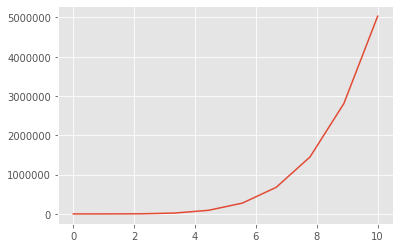

In [117]:
es = np.linspace(0, 10, 10)
plt.plot(es, 48*es**5 + 24*es**4 - 11*es**3 + 10*es**2+16*es +4)

In [293]:
e2.subs({epsilon**2: 0, epsilon**3: 0, epsilon**4: 0, epsilon**5: 0})

-(12*F_G^***3*epsilon - 6*F_G^***2*F_g^**epsilon - 26*F_G^***2*L_G^**epsilon + 5*F_G^***2*L_G^* + 14*F_G^**F_g^**L_G^**epsilon - 3*F_G^**F_g^**L_G^* + 26*F_G^**L_G^***2*epsilon - 5*F_G^**L_G^***2 - 14*F_g^**L_G^***2*epsilon + 3*F_g^**L_G^***2 + sqrt(8*F_G^***5*L_G^**epsilon + 12*F_G^***4*F_g^**L_G^**epsilon - 28*F_G^***4*L_G^***2*epsilon + F_G^***4*L_G^***2 - 16*F_G^***4*L_G^**L_g^**epsilon + 4*F_G^***3*F_g^***2*L_G^**epsilon - 20*F_G^***3*F_g^**L_G^***2*epsilon + 2*F_G^***3*F_g^**L_G^***2 + 40*F_G^***3*L_G^***3*epsilon - 2*F_G^***3*L_G^***3 + 48*F_G^***3*L_G^***2*L_g^**epsilon - 8*F_G^***2*F_g^***2*L_G^***2*epsilon + F_G^***2*F_g^***2*L_G^***2 - 4*F_G^***2*F_g^**L_G^***3 - 20*F_G^***2*L_G^***4*epsilon + F_G^***2*L_G^***4 - 32*F_G^***2*L_G^***3*L_g^**epsilon + 8*F_G^**F_g^***2*L_G^***3*epsilon - 2*F_G^**F_g^***2*L_G^***3 + 8*F_G^**F_g^**L_G^***4*epsilon + 2*F_G^**F_g^**L_G^***4 - 4*F_g^***2*L_G^***4*epsilon + F_g^***2*L_G^***4))/(16*F_G^***3*epsilon - 32*F_G^***2*L_G^**epsilon + 8*F_G^

### Next two cells confirms result from $\epsilon=0$

In [140]:
sym.simplify(e2.subs({epsilon: 0}))

(-5*F_G^***2 + 3*F_G^**F_g^* + 5*F_G^**L_G^* - 3*F_g^**L_G^* - sqrt(F_G^***4 + 2*F_G^***3*F_g^* - 2*F_G^***3*L_G^* + F_G^***2*F_g^***2 - 4*F_G^***2*F_g^**L_G^* + F_G^***2*L_G^***2 - 2*F_G^**F_g^***2*L_G^* + 2*F_G^**F_g^**L_G^***2 + F_g^***2*L_G^***2))/(8*F_G^**(F_G^* - L_G^*))

In [153]:

A, B, C, D = sym.symbols("A, B, C, D", real=True, nonnegative=True)

Delta = A**4 + 2*A**3*B - 2*A**3*C + A**2*B**2 - 4*A**2*B*C + A**2*C**2 - 2*A*B**2*C + 2*A*B*C**2 + B**2*C**2
sym.factor(Delta - (5*A**2 - 3*A*B - 5*A*C + 3*B*C)**2)

-8*(A - B)*(A - C)**2*(3*A - B)

In [258]:
str(sym.factor(e2))

'-(12*F_G^***3*epsilon + 4*F_G^***2*F_g^**epsilon**2 - 6*F_G^***2*F_g^**epsilon + 8*F_G^***2*L_G^**epsilon**3 + 28*F_G^***2*L_G^**epsilon**2 - 26*F_G^***2*L_G^**epsilon + 5*F_G^***2*L_G^* + 8*F_G^**F_g^**L_G^**epsilon**3 - 20*F_G^**F_g^**L_G^**epsilon**2 + 14*F_G^**F_g^**L_G^**epsilon - 3*F_G^**F_g^**L_G^* - 8*F_G^**L_G^***2*epsilon**3 - 28*F_G^**L_G^***2*epsilon**2 + 26*F_G^**L_G^***2*epsilon - 5*F_G^**L_G^***2 - 8*F_g^**L_G^***2*epsilon**3 + 20*F_g^**L_G^***2*epsilon**2 - 14*F_g^**L_G^***2*epsilon + 3*F_g^**L_G^***2 + sqrt(16*F_G^***6*epsilon**2 + 32*F_G^***5*F_g^**epsilon**3 + 16*F_G^***5*F_g^**epsilon**2 + 64*F_G^***5*L_G^**epsilon**4 + 96*F_G^***5*L_G^**epsilon**3 - 80*F_G^***5*L_G^**epsilon**2 + 8*F_G^***5*L_G^**epsilon + 128*F_G^***5*L_g^**epsilon**4 - 32*F_G^***5*L_g^**epsilon**2 + 16*F_G^***4*F_g^***2*epsilon**4 + 16*F_G^***4*F_g^***2*epsilon**3 + 4*F_G^***4*F_g^***2*epsilon**2 + 64*F_G^***4*F_g^**L_G^**epsilon**5 + 64*F_G^***4*F_g^**L_G^**epsilon**4 - 64*F_G^***4*F_g^**L_G^**

In [155]:
Delta = (16*A**6*epsilon**2 + 32*A**5*B*epsilon**3 + 16*A**5*B*epsilon**2 + 64*A**5*C*epsilon**4 + 96*A**5*C*epsilon**3 - 80*A**5*C*epsilon**2 + 8*A**5*C*epsilon + 128*A**5*D*epsilon**4 - 32*A**5*D*epsilon**2 + 16*A**4*B**2*epsilon**4 + 16*A**4*B**2*epsilon**3 + 4*A**4*B**2*epsilon**2 + 64*A**4*B*C*epsilon**5 + 64*A**4*B*C*epsilon**4 - 64*A**4*B*C*epsilon**3 - 16*A**4*B*C*epsilon**2 + 12*A**4*B*C*epsilon + 64*A**4*C**2*epsilon**6 + 192*A**4*C**2*epsilon**5 - 80*A**4*C**2*epsilon**4 - 320*A**4*C**2*epsilon**3 + 204*A**4*C**2*epsilon**2 - 28*A**4*C**2*epsilon + A**4*C**2 + 256*A**4*C*D*epsilon**5 - 512*A**4*C*D*epsilon**4 + 128*A**4*C*D*epsilon**2 - 16*A**4*C*D*epsilon + 64*A**3*B**2*C*epsilon**5 - 32*A**3*B**2*C*epsilon**3 + 4*A**3*B**2*C*epsilon + 128*A**3*B*C**2*epsilon**6 - 192*A**3*B*C**2*epsilon**5 + 32*A**3*B*C**2*epsilon**4 + 128*A**3*B*C**2*epsilon**3 - 24*A**3*B*C**2*epsilon**2 - 20*A**3*B*C**2*epsilon + 2*A**3*B*C**2 - 128*A**3*C**3*epsilon**6 - 384*A**3*C**3*epsilon**5 + 32*A**3*C**3*epsilon**4 + 448*A**3*C**3*epsilon**3 - 248*A**3*C**3*epsilon**2 + 40*A**3*C**3*epsilon - 2*A**3*C**3 - 768*A**3*C**2*D*epsilon**5 + 768*A**3*C**2*D*epsilon**4 - 192*A**3*C**2*D*epsilon**2 + 48*A**3*C**2*D*epsilon + 64*A**2*B**2*C**2*epsilon**6 - 128*A**2*B**2*C**2*epsilon**5 - 16*A**2*B**2*C**2*epsilon**4 + 64*A**2*B**2*C**2*epsilon**3 - 4*A**2*B**2*C**2*epsilon**2 - 8*A**2*B**2*C**2*epsilon + A**2*B**2*C**2 - 256*A**2*B*C**3*epsilon**6 + 512*A**2*B*C**3*epsilon**5 - 192*A**2*B*C**3*epsilon**4 - 128*A**2*B*C**3*epsilon**3 + 80*A**2*B*C**3*epsilon**2 - 4*A**2*B*C**3 + 64*A**2*C**4*epsilon**6 + 192*A**2*C**4*epsilon**5 - 16*A**2*C**4*epsilon**4 - 224*A**2*C**4*epsilon**3 + 124*A**2*C**4*epsilon**2 - 20*A**2*C**4*epsilon + A**2*C**4 + 512*A**2*C**3*D*epsilon**5 - 512*A**2*C**3*D*epsilon**4 + 128*A**2*C**3*D*epsilon**2 - 32*A**2*C**3*D*epsilon - 128*A*B**2*C**3*epsilon**6 + 128*A*B**2*C**3*epsilon**5 + 32*A*B**2*C**3*epsilon**4 - 64*A*B**2*C**3*epsilon**3 + 8*A*B**2*C**3*epsilon**2 + 8*A*B**2*C**3*epsilon - 2*A*B**2*C**3 + 128*A*B*C**4*epsilon**6 - 384*A*B*C**4*epsilon**5 + 224*A*B*C**4*epsilon**4 + 64*A*B*C**4*epsilon**3 - 72*A*B*C**4*epsilon**2 + 8*A*B*C**4*epsilon + 2*A*B*C**4 + 64*B**2*C**4*epsilon**6 - 64*B**2*C**4*epsilon**5 - 16*B**2*C**4*epsilon**4 + 32*B**2*C**4*epsilon**3 - 4*B**2*C**4*epsilon**2 - 4*B**2*C**4*epsilon + B**2*C**4)


In [156]:
Real = 12*A**3*epsilon + 4*A**2*B*epsilon**2 - 6*A**2*B*epsilon + 8*A**2*C*epsilon**3 + 28*A**2*C*epsilon**2 - 26*A**2*C*epsilon + 5*A**2*C + 8*A*B*C*epsilon**3 - 20*A*B*C*epsilon**2 + 14*A*B*C*epsilon - 3*A*B*C - 8*A*C**2*epsilon**3 - 28*A*C**2*epsilon**2 + 26*A*C**2*epsilon - 5*A*C**2 - 8*B*C**2*epsilon**3 + 20*B*C**2*epsilon**2 - 14*B*C**2*epsilon + 3*B*C**2


In [259]:
# When this expression is positive, then equilibrium cannot be invaded!
(sym.factor(Delta - (-Real)**2))

-8*(A + 2*C*epsilon - C)*(2*A*epsilon - 2*C*epsilon + C)*(8*A**4*epsilon + 4*A**3*B*epsilon**2 - 10*A**3*B*epsilon + 8*A**3*C*epsilon**3 + 20*A**3*C*epsilon**2 - 18*A**3*C*epsilon + 3*A**3*C - 8*A**3*D*epsilon**3 + 2*A**3*D*epsilon - 4*A**2*B**2*epsilon**2 + 2*A**2*B**2*epsilon + 8*A**2*B*C*epsilon**3 - 32*A**2*B*C*epsilon**2 + 22*A**2*B*C*epsilon - 4*A**2*B*C - 8*A**2*C**2*epsilon**3 - 20*A**2*C**2*epsilon**2 + 18*A**2*C**2*epsilon - 3*A**2*C**2 + 16*A**2*C*D*epsilon**3 - 4*A**2*C*D*epsilon - 8*A*B**2*C*epsilon**3 + 12*A*B**2*C*epsilon**2 - 6*A*B**2*C*epsilon + A*B**2*C - 16*A*B*C**2*epsilon**3 + 32*A*B*C**2*epsilon**2 - 20*A*B*C**2*epsilon + 4*A*B*C**2 + 8*B**2*C**2*epsilon**3 - 12*B**2*C**2*epsilon**2 + 6*B**2*C**2*epsilon - B**2*C**2)

In [286]:
# (A + 2Ce - C) and (2Ae - 2Ce + C) are both positive so when this is negative then equilibrium can not be invaded!
sym.factor(sym.cancel(sym.solve(8*A**4*epsilon + 4*A**3*B*epsilon**2 - 10*A**3*B*epsilon + 8*A**3*C*epsilon**3 + 20*A**3*C*epsilon**2 - 18*A**3*C*epsilon + 3*A**3*C - 8*A**3*D*epsilon**3 + 2*A**3*D*epsilon - 4*A**2*B**2*epsilon**2 + 2*A**2*B**2*epsilon + 8*A**2*B*C*epsilon**3 - 32*A**2*B*C*epsilon**2 + 22*A**2*B*C*epsilon - 4*A**2*B*C - 8*A**2*C**2*epsilon**3 - 20*A**2*C**2*epsilon**2 + 18*A**2*C**2*epsilon - 3*A**2*C**2 + 16*A**2*C*D*epsilon**3 - 4*A**2*C*D*epsilon - 8*A*B**2*C*epsilon**3 + 12*A*B**2*C*epsilon**2 - 6*A*B**2*C*epsilon + A*B**2*C - 16*A*B*C**2*epsilon**3 + 32*A*B*C**2*epsilon**2 - 20*A*B*C**2*epsilon + 4*A*B*C**2 + 8*B**2*C**2*epsilon**3 - 12*B**2*C**2*epsilon**2 + 6*B**2*C**2*epsilon - B**2*C**2, D)[0]))


(8*A**4*epsilon + 4*A**3*B*epsilon**2 - 10*A**3*B*epsilon + 8*A**3*C*epsilon**3 + 20*A**3*C*epsilon**2 - 18*A**3*C*epsilon + 3*A**3*C - 4*A**2*B**2*epsilon**2 + 2*A**2*B**2*epsilon + 8*A**2*B*C*epsilon**3 - 32*A**2*B*C*epsilon**2 + 22*A**2*B*C*epsilon - 4*A**2*B*C - 8*A**2*C**2*epsilon**3 - 20*A**2*C**2*epsilon**2 + 18*A**2*C**2*epsilon - 3*A**2*C**2 - 8*A*B**2*C*epsilon**3 + 12*A*B**2*C*epsilon**2 - 6*A*B**2*C*epsilon + A*B**2*C - 16*A*B*C**2*epsilon**3 + 32*A*B*C**2*epsilon**2 - 20*A*B*C**2*epsilon + 4*A*B*C**2 + 8*B**2*C**2*epsilon**3 - 12*B**2*C**2*epsilon**2 + 6*B**2*C**2*epsilon - B**2*C**2)/(2*A**2*epsilon*(A - 2*C)*(2*epsilon - 1)*(2*epsilon + 1))

8*A**4*epsilon + 8*A**3*C*epsilon**3 + 20*A**3*C*epsilon**2 - 18*A**3*C*epsilon + 3*A**3*C - 8*A**3*D*epsilon**3 + 2*A**3*D*epsilon - 8*A**2*C**2*epsilon**3 - 20*A**2*C**2*epsilon**2 + 18*A**2*C**2*epsilon - 3*A**2*C**2 + 16*A**2*C*D*epsilon**3 - 4*A**2*C*D*epsilon

In [239]:
c2, c1, c0 = p.coeffs()

In [243]:
# epsilon is small so coefficient is positive and quadratic opens up!
sym.factor(c2)

-(2*epsilon - 1)*(A + 2*C*epsilon - C)*(2*A*epsilon - 2*C*epsilon + C)

In [241]:
sym.factor(c1)

2*A*(A + 2*C*epsilon - C)*(2*A*epsilon**2 - 5*A*epsilon - 4*C*epsilon**2 + 6*C*epsilon - 2*C)

In [242]:
sym.factor(c0)

A**2*(8*A**2*epsilon + 8*A*C*epsilon**3 + 20*A*C*epsilon**2 - 18*A*C*epsilon + 3*A*C - 8*A*D*epsilon**3 + 2*A*D*epsilon - 8*C**2*epsilon**3 - 20*C**2*epsilon**2 + 18*C**2*epsilon - 3*C**2 + 16*C*D*epsilon**3 - 4*C*D*epsilon)

In [251]:
Fg_low, Fg_high = sym.solve(p, B)

In [253]:
Fg_low

A*(sqrt((A + 2*C*epsilon - C)*(4*A**3*epsilon**4 + 12*A**3*epsilon**3 + 9*A**3*epsilon**2 + 40*A**2*C*epsilon**5 + 4*A**2*C*epsilon**4 - 10*A**2*C*epsilon**3 - 13*A**2*C*epsilon**2 + 6*A**2*C*epsilon - 32*A**2*D*epsilon**5 + 16*A**2*D*epsilon**4 + 8*A**2*D*epsilon**3 - 4*A**2*D*epsilon**2 - 96*A*C**2*epsilon**5 + 48*A*C**2*epsilon**4 + 8*A*C**2*epsilon**3 + 8*A*C**2*epsilon**2 - 8*A*C**2*epsilon + A*C**2 + 96*A*C*D*epsilon**5 - 64*A*C*D*epsilon**4 - 16*A*C*D*epsilon**3 + 16*A*C*D*epsilon**2 - 2*A*C*D*epsilon + 64*C**3*epsilon**5 - 64*C**3*epsilon**4 + 8*C**3*epsilon**3 + 4*C**3*epsilon**2 + 2*C**3*epsilon - C**3 - 64*C**2*D*epsilon**5 + 64*C**2*D*epsilon**4 - 16*C**2*D*epsilon**2 + 4*C**2*D*epsilon))*(2*epsilon - 1)*(2*A*epsilon - 2*C*epsilon + C) - (-2*A*epsilon**2 + 5*A*epsilon + 4*C*epsilon**2 - 6*C*epsilon + 2*C)*(4*A**2*epsilon**2 - 2*A**2*epsilon + 8*A*C*epsilon**3 - 12*A*C*epsilon**2 + 6*A*C*epsilon - A*C - 8*C**2*epsilon**3 + 12*C**2*epsilon**2 - 6*C**2*epsilon + C**2))/((2*eps

## Suppose that $U_G=1$, $U_g=x_1^*$

In [308]:
# A = FG, B=Fg, C=LG, D=Lg

_Fg_star = 2 * ((R + P - T - S) * (1 / (2*epsilon + 1))**2 + (T + S - 2*P) * (1 / (2*epsilon + 1)) + P)
_Lg_star = 2*(R - S)*(1 / (2*epsilon+1))**2 + 2*S*(1 / (2*epsilon + 1))
sym.factor(sym.cancel(sym.together(sym.expand((Delta - (-Real)**2).subs({A: 2*R, C: 2*R})))))

512*R**4*epsilon**2*(2*B**2*epsilon - B**2 + 8*B*R*epsilon**2 - 4*B*R*epsilon + 8*B*R - 8*D*R*epsilon**2 + 2*D*R - 16*R**2)

In [269]:
_Fg_lower, _Fg_upper = sym.solve(B**2*(2*epsilon - 1) + B*(8*R*epsilon**2 - 4*R*epsilon + 8*R) - 8*D*R*epsilon**2 + 2*D*R - 16*R**2, B)

In [309]:
_Fg_lower

(-2*R*(2*epsilon**2 - epsilon + 2) + sqrt(2)*sqrt(R*(8*D*epsilon**3 - 4*D*epsilon**2 - 2*D*epsilon + D + 8*R*epsilon**4 - 8*R*epsilon**3 + 18*R*epsilon**2 + 8*R*epsilon)))/(2*epsilon - 1)

In [274]:
_Fg_upper

-(2*R*(2*epsilon**2 - epsilon + 2) + sqrt(2)*sqrt(R*(8*D*epsilon**3 - 4*D*epsilon**2 - 2*D*epsilon + D + 8*R*epsilon**4 - 8*R*epsilon**3 + 18*R*epsilon**2 + 8*R*epsilon)))/(2*epsilon - 1)

In [276]:
sym.factor(8*epsilon**3 - 4*epsilon**2 -2*epsilon + 1)

(2*epsilon - 1)**2*(2*epsilon + 1)

In [279]:
sym.factor(4*epsilon**3 - 4*epsilon**2 + 9*epsilon + 4)

4*epsilon**3 - 4*epsilon**2 + 9*epsilon + 4

In [213]:
p = sym.poly(80*R**2*epsilon**2 + 64*R**2*epsilon + 12*R**2 + 32*R*S*epsilon**3 - 8*R*S*epsilon - 16*R*epsilon**3 - 12*R*epsilon - 8*R - 2*epsilon + 1, epsilon)
aa


In [214]:
p.coeffs()[0]

32*R*S - 16*R

In [215]:
p.coeffs()[1]

80*R**2

In [216]:
p.coeffs()[2]

64*R**2 - 8*R*S - 12*R - 2

In [217]:
p.coeffs()[3]

12*R**2 - 8*R + 1

In [224]:
sym.factor(p.coeffs()[1]**2 - 3*p.coeffs()[0] * p.coeffs()[2])#.subs({S:1})

32*R*(200*R**3 - 192*R**2*S + 96*R**2 + 24*R*S**2 + 24*R*S - 18*R + 6*S - 3)

In [226]:
sym.factor((-192*S+96)**2 - 3*200*(24*S**2 + 24*S - 18))

144*(2*S - 1)*(78*S - 139)

In [205]:
sym.solve(sym.diaaaff(p), epsilon)

[-(-3*(5*R - 3*S)/(8*S) + (6*R - 6*S - 3)**2/(256*S**2))/(3*(sqrt(-4*(-3*(5*R - 3*S)/(8*S) + (6*R - 6*S - 3)**2/(256*S**2))**3 + (-9*(5*R - 3*S)*(6*R - 6*S - 3)/(128*S**2) + (6*R - 6*S - 3)**3/(2048*S**3) + 27*(28*R**2 + 4*R*S - 6*R - 1)/(128*R*S))**2)/2 - 9*(5*R - 3*S)*(6*R - 6*S - 3)/(256*S**2) + (6*R - 6*S - 3)**3/(4096*S**3) + 27*(28*R**2 + 4*R*S - 6*R - 1)/(256*R*S))**(1/3)) - (sqrt(-4*(-3*(5*R - 3*S)/(8*S) + (6*R - 6*S - 3)**2/(256*S**2))**3 + (-9*(5*R - 3*S)*(6*R - 6*S - 3)/(128*S**2) + (6*R - 6*S - 3)**3/(2048*S**3) + 27*(28*R**2 + 4*R*S - 6*R - 1)/(128*R*S))**2)/2 - 9*(5*R - 3*S)*(6*R - 6*S - 3)/(256*S**2) + (6*R - 6*S - 3)**3/(4096*S**3) + 27*(28*R**2 + 4*R*S - 6*R - 1)/(256*R*S))**(1/3)/3 - (6*R - 6*S - 3)/(48*S),
 -(-3*(5*R - 3*S)/(8*S) + (6*R - 6*S - 3)**2/(256*S**2))/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*(5*R - 3*S)/(8*S) + (6*R - 6*S - 3)**2/(256*S**2))**3 + (-9*(5*R - 3*S)*(6*R - 6*S - 3)/(128*S**2) + (6*R - 6*S - 3)**3/(2048*S**3) + 27*(28*R**2 + 4*R*S - 6*R - 1)/(128*R

In [ ]:
p.

# One-locus model

In this model both alleles of the $\gamma$ gene are present, however only the $A$ allele of the $\alpha$ gene is present. Formally set $x_2=1 - x_1, x_3=x_4=0$.

In [3]:
x1 = sym.symbols("x1", real=True, nonnegative=True)
T, R, P, S = sym.symbols('T, R, P, S', real=True, positive=True)
UGA = selection_functions.UGA

# Total offspring (fitness)

In [4]:
x = np.array([[x1], [1 - x1], [0], [0]])
payoff_kernel = np.array([[R, S], [T, P]])
W = models.generalized_sexual_selection(x, UGA, lambda x: x, payoff_kernel, 0, 0, 0)
N, = models.total_offspring(W, x)

In [5]:
sym.factor(N, UGA(x1))

4.0*(0.5*P + (-1.0*P + 0.5*S + 0.5*T)*UGA(x1) + (0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1)**2)

After a bit of algebra we arrive at the following expression for total offspring.

\begin{align}
   % N(x_1) =& 2.0*P*UGA(x1)**2 - 4.0*P*UGA(x1) + 2.0*P + 2.0*R*UGA(x1)**2 - 2.0*S*UGA(x1)**2 + 2.0*S*UGA(x1) - 2.0*T*UGA(x1)**2 + 2.0*T*UGA(x1) -2.0*M\\
   % N(x_1) =& 2\bigg(PU_{GA}(x_1)^2 - 2PU_{GA}(x_1) + P + RU_{GA}(x_1)^2 - SU_{GA}(x_1)^2 + SU_{GA}(x_1) - TU_{GA}(x_1)^2 + TU_{GA}(x_1) - M\bigg) \\
   % N(x_1) =& 2\bigg(RU_{GA}(x_1)^2 + PU_{GA}(x_1)^2 - TU_{GA}(x_1)^2 - SU_{GA}(x_1)^2 + SU_{GA}(x_1) + TU_{GA}(x_1) - 2PU_{GA}(x_1) + (P - M)\bigg) \\
    N(x_1) =& 2\bigg(\big((R + P) - (T + S)\big)U_{GA}(x_1)^2 + \big((T + S) - 2P\big)U_{GA}(x_1) + (P - M)\bigg) \\
\end{align}

## Equilibrium total offspring

Consider an equilibrium $x^*$ and define the constant equilibrium selection probability as $U_{GA}^* = U_{GA}(x^*)$.

In [26]:
UG_star = sym.symbols("UG_star")
equilibrium_total_offspring = sym.factor(N.subs({UGA(x1): UG_star}), UG_star)

In [27]:
equilibrium_total_offspring

4.0*(0.5*P + UG_star**2*(0.5*P + 0.5*R - 0.5*S - 0.5*T) + UG_star*(-1.0*P + 0.5*S + 0.5*T))

## Maximizing equilibrium total offspring

Find the value of the equilibrium selection probability $U_{GA}^*$ that maximizes total offspring.

### Find the optimal value of $U_{GA}^*$.

The number of total offspring can be written as a function of the equilibrium selection probability.

$$ N(U_{GA}^*) = 2\bigg(\big((R + P) - (T + S)\big)U_{GA}^{*2} + \big((T + S) - 2P\big)U_{GA}^* + (P - M) \bigg)$$

To find the equilibrium selection probability that maximizes the number of total offspring we need to solve the following constrained optimization problem.

$$ \max_{U_{GA}^*}\ 2\bigg(\big((R + P) - (T + S)\big)U_{GA}^{*2} + \big((T + S) - 2P\big)U_{GA}^* + (P - M) \bigg) $$

subject to the following inequality constraints.

\begin{align}
    -U_{GA}^* \le& 0 \\
    U_{GA}^* - 1 \le& 0
\end{align}

The total offspring maximizing equilibrium value for $U_{GA}^*$ must satisfy the following first-order condition.

$$ 4\big((R + P) - (T + S)\big)U_{GA} + 2\big((T + S) - 2P\big) = -\mu_0 + \mu_1 $$

Complementary slackness conditions are

\begin{align}
    -\mu_0U_{GA}^* =& 0 \\
    \mu_1U_{GA}^* - 1 =& 0
\end{align}

where $\mu_0, \mu_1$ are Lagrange multipliers.

#### Case 1: $\mu_0=0, \mu_1>0$; total offspring is maximized by $U_{GA}^*=1$

Substituting $U_{GA}^*=1$ into the first order condition yields

$$ 4\big((R + P) - (T + S)\big) + 2\big((T + S) - 2P\big) = \mu_1 $$

which reduces to the following.

$$ 4R - 2(T + S) = \mu_1 $$

The value of the Lagrange multiplier is equal to the slope of the objective at the constraint. Since the constraint is binding and the multiplier is positive it must be the case that 

$$ 2R > T + S $$

which tells us that the joint payoff to mutual cooperation must exceed the payoff to hierarchy. Note that the total number of offspring at $N(1) = 2(R - M)$.

#### Case 2: $\mu_0>0, \mu_1=0$; total offspring is (locally) maximized by $U_{GA}^*=0$

Substituting $U_{GA}^*=0$ into the first order condition yields

$$ 2\big((T + S) - 2P\big) = -\mu_0 $$

which reduces to the following.

$$ -2\big((T + S) - 2P\big) = \mu_0 $$

The value of the Lagrange multiplier is equal to the slope of the objective at the constraint. Since the constraint is binding and the multiplier is positive it must be the case that 

$$ T + S < 2P $$

which tells us that the payoff to hierarchy must be strictly less than the payoff to mutual exploitation. Note that the number of offspring at $N(0) = 2(P - M)$. Note however that because $R > P$, $U_{GA}^*=0$ can only ever be a local maximum.


#### Case 3: $\mu_0=0, \mu_1=0$; total offspring is maximized by $0 < U_{GA}^* < 1$

Setting the first order condition equal to zero and solving for the optimal value of $U_{GA}^*$ yield the following result.

$$ \bar{U}_{GA}^* = \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right) $$

Second order condition for this interior maximum requires that the following payoff restriction holds. 

$$ R + P < T + S $$

The total offspring produced at this optimal equilibrium selection probability is as follows.

$$ N(\bar{U}_{GA}^*) = 2(P-M) + \frac{1}{2}\left(\frac{\big(2P - (T + S)\big)^2}{(T + S) - (R + P)}\right) $$

An interior maximum requires that the slope of the objective at the lower bound be strictly positive and that the slope of the objective at the upper bound be strictly negative (i.e., both constraints are slack!).  This imposes the following additional restrictions on payoffs.

$$ 2P < 2R < T + S $$

Again, we have that the payoff to hierarchy must strictly dominate the payoff to mutual cooperation.

### Discussion

Now that we have gone through the maths, it is useful to characterize how the maximum value of $U_{GA}^*$ depends on model parameters.

* Suppose that $2P < R + P < T + S < 2R$. In this case the unqiue global maximum value of equilibrium total offspring is $N^{**}=2(R - M)$ and is obtained at $U_{GA}^{**}=1 $.
* Suppose that $2P < R + P < 2R < T + S$. In this case the unique global maximum value of equilibrium total offspring os $N^{**}= ???$ and is obtained at $U_{GA}^{**} = \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right) $


Because $R > P$, the global maximum number of offspring will either be $N(1)=2(R - M)$ or will be an interior maximum with $N(U_{GA}^*) > 2R$. If second order condition for interior maximum fails (i.e., $R + P > T + S$), then interior optimimum is actually a global minimum! In this case while the global maximum is still $U_{GA}^*=1$, there is a local maxmium at $U_{GA}^*=0$.  It might be interesting to explore the invadability of both of these points when $R + P > T + S$.

#### Conditions under which $N(U_{GA}^*)$ is monotonically increasing and convex
$N'(U_{GA}^*) > 0$ requires that 

$$ U_{GA}^* > \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right) $$

while $N''(U_{GA}^*) > 0$ requires that

$$ (R + P) > (T + S) > 0. $$

Monotonically increasing and convex $N(U_{GA}^*)$ implies global maximum occurs at $U_{GA}^*=1$ (and no local maximum at $U_{GA}^*=0$).

#### Conditions under which $N(U_{GA}^*)$ is monotonically increasing and concave
$N'(U_{GA}^*) > 0$ requires that 

$$ U_{GA}^* > \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right) $$

while $N''(U_{GA}^*) < 0$ requires that

$$ (R + P) < (T + S)$$

Monotonically increasing and concave $N(U_{GA}^*)$ implies global maximum occurs at $U_{GA}^*=1$ (and no local maximum at $U_{GA}^*=0$).


In [28]:
# solve for the interior value of UGA* that maximizes total offspring
foc = equilibrium_total_offspring.diff(UG_star, 1)
optimal_U_star, = sym.solve(foc, UG_star)

In [29]:
optimal_U_star

(P - 0.5*S - 0.5*T)/(P + R - S - T)

In [19]:
_equilibrium_total_offspring = sym.lambdify((UG_star, T, R, P, S),
                                            equilibrium_total_offspring,
                                            modules="numpy")

def plot_total_offspring(T, R, P, S, M):
    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    us = np.linspace(0, 1, 100)
    ax.plot(us, _equilibrium_total_offspring(us, T, R, P, S, M))
    ax.set_title(r"Total number of offspring", fontsize=25)
    ax.set_xlabel(r"$U^*$", fontsize=25)
    ax.set_ylabel(r"N", rotation="horizontal", fontsize=25)
    plt.show()

In [22]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

# slider used to control metabolic costs
M_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$M$")

w = widgets.interactive(plot_total_offspring, T=T_slider, R=R_slider, P=P_slider, S=S_slider, M=M_slider)
display(w)

interactive(children=(FloatSlider(value=25.0, description='$T$'), FloatSlider(value=3.0, description='$R$'), F…

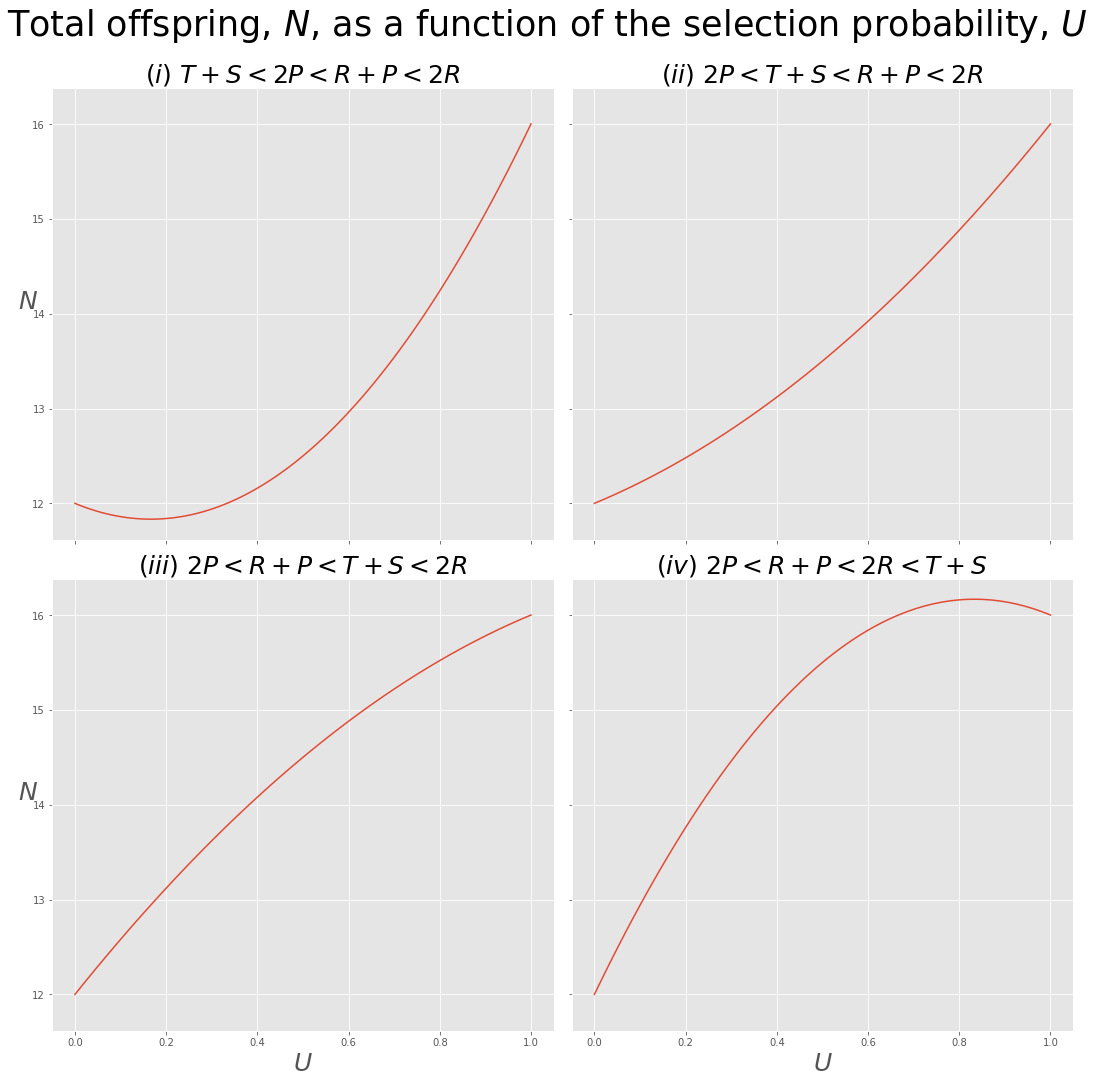

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 15))

us = np.linspace(0, 1, 100)

axes[0,0].plot(us, _equilibrium_total_offspring(us, 10, 8, 6, 1, 0))
axes[0,0].set_title(r"$(i)\ T + S < 2P < R + P < 2R$", fontsize=25)
axes[0,0].set_ylabel(r"$N$", rotation="horizontal", fontsize=25)

axes[0,1].plot(us, _equilibrium_total_offspring(us, 10, 8, 6, 3, 0))
axes[0,1].set_title(r"$(ii)\ 2P < T + S < R + P < 2R$", fontsize=25)

axes[1,0].plot(us, _equilibrium_total_offspring(us, 10, 8, 6, 5, 0))
axes[1,0].set_title(r"$(iii)\ 2P < R + P < T + S < 2R$", fontsize=25)
axes[1,0].set_xlabel(r"$U$", fontsize=25)
axes[1,0].set_ylabel(r"$N$", rotation="horizontal", fontsize=25)

axes[1,1].plot(us, _equilibrium_total_offspring(us, 14, 8, 6, 3, 0))
axes[1,1].set_title(r"$(iv)\ 2P < R + P < 2R < T + S$", fontsize=25)
axes[1,1].set_xlabel(r"$U$", fontsize=25)

fig.tight_layout()
fig.subplots_adjust(top=0.925)
fig.suptitle("Total offspring, $N$, as a function of the selection probability, $U$", x=0.5, y=1.0, fontsize=35)

plt.savefig("maximizing-total-offspring-various-payoffs.jpg")
plt.show()

In [6]:
(f1,), *_ = models.offspring_genotypes_evolution(W, x)

In [153]:
N = sym.Function('N')

In [172]:
sym.factor((sym.factor(sym.together(f1 + x1), U(x1), x1, epsilon)
    .subs({(-0.5*M + 0.5*P + (-1.0*P + 0.5*S + 0.5*T)*U(x1) + (0.5*P + 0.5*R - 0.5*S - 0.5*T)*U(x1)**2): 0.25 * N(x1),
           epsilon*x1*(-0.5*M + 0.5*P) + epsilon*x1*(-1.0*P + 0.5*S + 0.5*T)*U(x1) + epsilon*x1*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*U(x1)**2: 0.25 * x1 * epsilon * N(x1),
           x1*(0.25*M - 0.25*P) + x1*(0.5*P - 0.25*S - 0.25*T)*U(x1) + x1*(-0.25*P - 0.25*R + 0.25*S + 0.25*T)*U(x1)**2: 0.125 * x1 * N(x1)})), N(x1), U(x1)) - x1

-x1 - 4.0*(0.5*M*epsilon - 0.5*P*epsilon + (0.25*epsilon*x1 + 0.125*x1)*N(x1) + (-0.5*P*epsilon - 0.25*R + 0.25*S + 0.5*T*epsilon)*U(x1)**2 + (-0.5*M*epsilon + 0.25*M + 1.0*P*epsilon - 0.25*S - 0.5*T*epsilon)*U(x1))/N(x1)

In [167]:
1 / 8

0.125

# The locus of potential equilibria (LPE)

In [144]:
x1_star, = sym.solve(f1.subs({U(x1): U_star}), x1)
sym.factor(x1_star, U_star, epsilon)

KeyboardInterrupt: 

$$ L(x_1^*; U^*) = x_1^* - \Bigg(\frac{1}{(1 + 2\epsilon)}\frac{(U^{*2}\epsilon(2P - 2T) + U^{*2}(R - S) + U^*\epsilon(2M - 4P + 2T) + U^*(-M + S) + \epsilon(-2M + 2P))}{((-M + P + U^{*2}(P + R - S - T) + U^*(-2P + S + T)))}\Bigg) $$

Setting the equation of motion equal to zero, rearranging the resulting equation yields the locus of potential equilibria (LPE). The LPE represents, for each possible $x_1$, the value that $U_{GA}$ would have to take in order for that $x_1$ to be an equilbrium. 

\begin{align}
  L(x^*) \equiv x_1^* - 2\left(\frac{\big(R - S\big)U_{GA}^{*2} + \big(S - M\big)U_{GA}^*}{N(U_{GA}^*)}\right) = 0\\
\end{align}

We already know that $x_1^*=0, U_{GA}^*=0$ and $x_1^*=1, U_{GA}^*=1$ are equilibria, so it follows that $L(0)=0$ and $L(1)=0$.


Differentiate $x_1^*$ with respect to $U_{GA}^*$ yields an expression that will be useful for assessing stability and invadability of an equilibrium.

In [20]:
dx1star_dUGA_star = sym.factor(sym.cancel(sym.diff(x1_star, UGA_star, 1)))

In [21]:
dx1star_dUGA_star

-0.5*(1.0*epsilon - 0.5)*(0.5*M**2 + 0.5*M*P*UGA_star**2 - 0.5*M*P + 0.5*M*R*UGA_star**2 - 1.0*M*R*UGA_star - 0.5*M*S*UGA_star**2 + 1.0*M*S*UGA_star - 0.5*M*S - 0.5*M*T*UGA_star**2 - 1.0*P*R*UGA_star**2 + 1.0*P*R*UGA_star + 0.5*P*S*UGA_star**2 - 1.0*P*S*UGA_star + 0.5*P*S + 0.5*R*T*UGA_star**2)/((1.0*epsilon + 0.5)*(0.5*M - 0.5*P*UGA_star**2 + 1.0*P*UGA_star - 0.5*P - 0.5*R*UGA_star**2 + 0.5*S*UGA_star**2 - 0.5*S*UGA_star + 0.5*T*UGA_star**2 - 0.5*T*UGA_star)**2)

Substituting the equilibrium value for $U_{GA}^*$ that maximizes total offspring, $\bar{U}_{GA}^*$, into the expression for $x_1^*$ we can find the equilibrium value of $x_1^*$ that maximizes total offspring.

\begin{align}
   % \frac{(P - \frac{1}{2}S - \frac{1}{2}T)(PR + \frac{1}{2}RS - \frac{1}{2}RT - \frac{1}{2}S^2 - \frac{1}{2}ST)}{((\frac{1}{2}P + \frac{1}{2}R - \frac{1}{2}S - \frac{1}{2}T)(2PR - \frac{1}{2}S^2 - ST - \frac{1}{2}T^2))} \\
   % \frac{\big(2P - (T + S)\big)(PR + \frac{1}{2}RS - \frac{1}{2}RT - \frac{1}{2}S^2 - \frac{1}{2}ST)}{\big((R + P) - (T + S)\big)(2PR - \frac{1}{2}S^2 - ST - \frac{1}{2}T^2)} \\
   % \frac{\big(2P - (T + S)\big)\big(2PR + RS - RT - S^2 - ST\big)}{\big((R + P) - (T + S)\big)\big(4PR - S^2 - 2ST - T^2\big)} \\
   % \left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right)\left(\frac{2PR + RS - RT - S^2 - ST}{4PR - S^2 - 2ST - T^2}\right) \\
   % \left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right)\left(\frac{2PR + RS - RT - S^2 - ST}{4PR - (T + S)^2}\right) \\
   % \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right)\left(\frac{2(2PR + RS - RT - S^2 - ST)}{4PR - (T + S)^2}\right) \\
   % \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right)\left(\frac{4PR + 2RS - 2RT - 2S^2 - 2ST}{4PR - (T + S)^2}\right) \\
   % \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right)\left(\frac{4PR + 2RS - 2RT -4RS + 4RS - 2S^2 - 2ST}{4PR - (T + S)^2}\right) \\
   % \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right)\left(\frac{2R\big(2P + S - T - 2S\big) + 2S\big(2R - S - T\big)}{4PR - (T + S)^2}\right) \\
   % \frac{1}{2}\left(\frac{2P - (T + S)}{(R + P) - (T + S)}\right)\left(\frac{2R\big(2P - (T + S)\big) + 2S\big(2R - (T + S)\big)}{4PR - (T + S)^2}\right) \\
    \bar{x}_1^* = \left(\frac{2R\big(2P - (T + S)\big) + 2S\big(2R - (T + S)\big)}{4PR - (T + S)^2}\right)\bar{U}_{GA}^*
\end{align}

In [22]:
optimal_x1_star = sym.factor(sym.cancel(x1_star.subs({UGA_star: optimal_UGA_star})))

In [23]:
optimal_x1_star

1.5*(0.333333333333333*M*P**2 + 0.666666666666667*M*P*R*epsilon + 0.333333333333333*M*P*R - 0.333333333333333*M*P*S*epsilon - 0.5*M*P*S - 0.333333333333333*M*P*T*epsilon - 0.5*M*P*T + 0.666666666666667*M*R**2*epsilon - 1.0*M*R*S*epsilon - 0.166666666666667*M*R*S - 1.0*M*R*T*epsilon - 0.166666666666667*M*R*T + 0.333333333333333*M*S**2*epsilon + 0.166666666666667*M*S**2 + 0.666666666666667*M*S*T*epsilon + 0.333333333333333*M*S*T + 0.333333333333333*M*T**2*epsilon + 0.166666666666667*M*T**2 - 0.333333333333333*P**2*R - 0.666666666666667*P*R**2*epsilon + 0.666666666666667*P*R*S*epsilon + 0.333333333333333*P*R*T - 0.166666666666667*P*S**2*epsilon + 0.166666666666667*P*S**2 + 0.166666666666667*P*S*T + 0.166666666666667*P*T**2*epsilon + 0.0833333333333333*R*S**2 + 0.333333333333333*R*S*T*epsilon + 0.333333333333333*R*T**2*epsilon - 0.0833333333333333*R*T**2 - 0.0833333333333333*S**3 - 0.166666666666667*S**2*T*epsilon - 0.166666666666667*S**2*T - 0.333333333333333*S*T**2*epsilon - 0.0833333333

## Interactive plot of the locus of potential equilibria

In [48]:
_locus_of_potential_equilibria = sym.lambdify((UGA_star, T, R, P, S, M, epsilon),
                                              x1_star,
                                              modules="numpy")


def plot_locus_of_potential_equilibria(selection_function, d1, T, R, P, S, M, epsilon):
    assert T > R > P > S
    us = np.linspace(0, 1, 100)
    xs = _locus_of_potential_equilibria(us, T, R, P, S, M, epsilon)

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.plot(xs, us, label="LPE")
    ax.set_xlabel(r"$x_1^*$", fontsize=25)
    ax.set_ylabel(r"$U*$", rotation="horizontal", fontsize=25)
    ax.plot(us, us, 'k--', label="random mating")
    
    # create the selection functions
    if selection_function == "kirkpatrick":
        UGA = lambda x_A: selection_functions.kirkpatrick_selection(x_A, d1)
        ax.plot(xs, UGA(xs), label=selection_function)
    elif selection_function == "seger":
        UGA = lambda x_A: selection_functions.seger_selection(x_A, d1)
        ax.plot(xs, UGA(xs), label=selection_function)
    elif selection_function == "wright":
        UGA = lambda x_A: selection_functions.wright_selection(x_A, d1)
        ax.plot(xs, UGA(xs), label=selection_function)
    if selection_function == "none":
        pass
    else:
        valid_funcs = ("kirkpatrick", "seger", "wright", "none")
        msg = "Selection_function must be one of {}, {}, or {}.".format(*valid_funcs)
        raise ValueError(msg)
        
    ax.legend()
        
    return fig

In [49]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

# slider used to control metabolic costs
M_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$M$")

# slider used to control which selection function is being used
UGA_slider = widgets.Dropdown(options=["none", "kirkpatrick", "seger", "wright"], index=0, description=r"$U_{\gamma(j)A}$")

# slider that controls the parameters of the selection function
d1_slider = widgets.FloatSlider(value=1.0, min=0.0, max=10, step=0.05, description=r"$d_1$")

# slider that controls the parameters of the selection function
epsilon_slider = widgets.FloatSlider(value=0.0, min=0.0, max=1, step=1e-3, description=r"$\epsilon$")

w = widgets.interactive(plot_locus_of_potential_equilibria, selection_function=UGA_slider, d1=d1_slider,
                        T=T_slider, R=R_slider, P=P_slider, S=S_slider, M=M_slider, epsilon=epsilon_slider)
display(w)

interactive(children=(Dropdown(description='$U_{\\gamma(j)A}$', options=('none', 'kirkpatrick', 'seger', 'wrig…

In [50]:
w.result.savefig("./images/locus-potential-equilibria.jpg")

In [26]:
d = sym.symbols('d', real=True, nonnegative=True)
sym.solve(x1 - sym.factor(sym.together(x1_star.subs({UGA_star: selection_functions.kirkpatrick_selection(x1, d), M: 0, epsilon: 0}))), x1)

[0.0, 1.00000000000000, -(-P + S*d)/(P + R*d**2 - S*d - T*d)]

In [48]:
def make_plot(T, R, P, S, d):
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))

    us = np.linspace(0, 1, 100)

    axes[0].plot(_equilibrium_total_offspring(us, T, R, P, S, 0), us)
    axes[0].set_title(r"", fontsize=25)
    axes[0].set_ylim(-0.05, 1.05)
    axes[0].set_xlabel(r"$N$", rotation="horizontal", fontsize=25)
    axes[0].set_ylabel(r"$U$", rotation="horizontal", fontsize=25)

    xs = _locus_of_potential_equilibria(us, T, R, P, S, 0, 0)
    axes[1].plot(xs, us, label="LPE")
    axes[1].plot(xs, selection_functions.kirkpatrick_selection(xs, d), label="Kirkpatrick Selection")
    axes[1].set_xlabel(r"$x_1$", fontsize=25)
    axes[1].set_xlim(-0.05, 1.05)

    equilibrium_x1 = -(-P + S*d)/(P + R*d**2 - S*d - T*d)
    equilibrium_U = selection_functions.kirkpatrick_selection(equilibrium_x1, d)
    equilibrium_N = _equilibrium_total_offspring(equilibrium_U, T, R, P, S, 0)
    axes[0].axhline(equilibrium_U, color='k', linestyle="dashed")
    axes[0].vlines(equilibrium_N, -1, equilibrium_U, 'k', linestyle="dashed")
    axes[1].hlines(equilibrium_U, -1, equilibrium_x1, 'k', linestyle="dashed")
    axes[1].vlines(equilibrium_x1, -1, equilibrium_U, 'k', linestyle="dashed")

    # add selection functions for comparison
    axes[1].legend()
    return fig

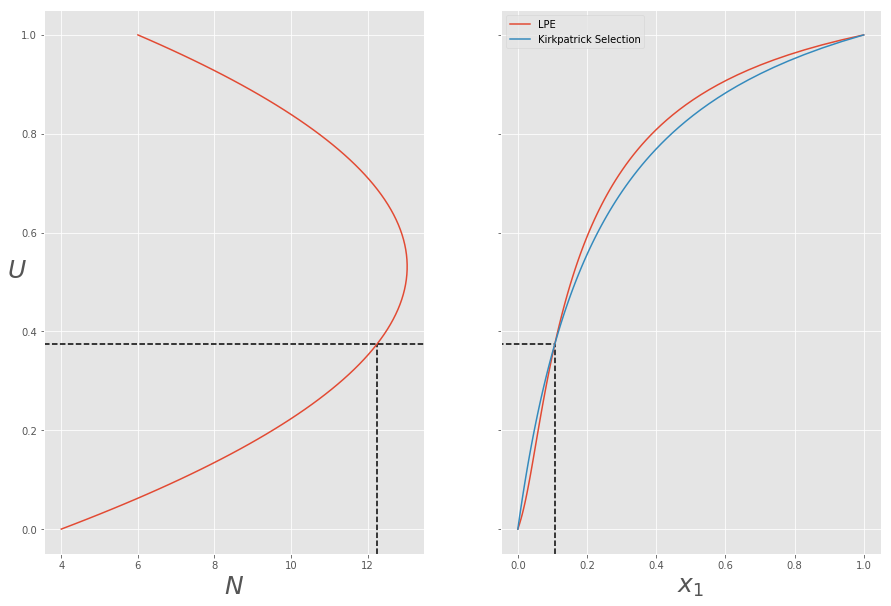

In [28]:
make_plot(20, 3, 2, 1, 5)

(2.0*P*epsilon*(P - 0.5*S - 0.5*T)**2 - 4.0*P*epsilon*(P - 0.5*S - 0.5*T)*(P + R - S - T) + 2.0*P*epsilon*(P + R - S - T)**2 + R*(P - 0.5*S - 0.5*T)**2 - S*(P - 0.5*S - 0.5*T)**2 + S*(P - 0.5*S - 0.5*T)*(P + R - S - T) - 2.0*T*epsilon*(P - 0.5*S - 0.5*T)**2 + 2.0*T*epsilon*(P - 0.5*S - 0.5*T)*(P + R - S - T))/((2.0*epsilon + 1.0)*(P*(P - 0.5*S - 0.5*T)**2 - 2.0*P*(P - 0.5*S - 0.5*T)*(P + R - S - T) + P*(P + R - S - T)**2 + R*(P - 0.5*S - 0.5*T)**2 - S*(P - 0.5*S - 0.5*T)**2 + S*(P - 0.5*S - 0.5*T)*(P + R - S - T) - T*(P - 0.5*S - 0.5*T)**2 + T*(P - 0.5*S - 0.5*T)*(P + R - S - T)))

In [39]:
optimal_x1_star.subs({M:0})

1.5*(-0.333333333333333*P**2*R - 0.666666666666667*P*R**2*epsilon + 0.666666666666667*P*R*S*epsilon + 0.333333333333333*P*R*T - 0.166666666666667*P*S**2*epsilon + 0.166666666666667*P*S**2 + 0.166666666666667*P*S*T + 0.166666666666667*P*T**2*epsilon + 0.0833333333333333*R*S**2 + 0.333333333333333*R*S*T*epsilon + 0.333333333333333*R*T**2*epsilon - 0.0833333333333333*R*T**2 - 0.0833333333333333*S**3 - 0.166666666666667*S**2*T*epsilon - 0.166666666666667*S**2*T - 0.333333333333333*S*T**2*epsilon - 0.0833333333333333*S*T**2 - 0.166666666666667*T**3*epsilon)/((1.0*epsilon + 0.5)*(1.0*P + 1.0*R - 1.0*S - 1.0*T)*(-1.0*P*R + 0.25*S**2 + 0.5*S*T + 0.25*T**2))

In [41]:
optimal_d, = sym.solve(optimal_UGA_star - selection_functions.kirkpatrick_selection(optimal_x1_star.subs({M:0}), d), d)

In [51]:
sym.factor(optimal_d)

1.0*(1.0*P - 0.5*S - 0.5*T)*(1.0*P**2*R*epsilon + 0.5*P*R**2 - 0.5*P*R*S - 1.0*P*R*T*epsilon - 0.5*P*S**2*epsilon + 0.125*P*S**2 - 0.5*P*S*T*epsilon - 0.125*P*T**2 - 0.25*R*S**2*epsilon - 0.25*R*S*T + 0.25*R*T**2*epsilon - 0.25*R*T**2 + 0.25*S**3*epsilon + 0.5*S**2*T*epsilon + 0.125*S**2*T + 0.25*S*T**2*epsilon + 0.25*S*T**2 + 0.125*T**3)/((1.0*R - 0.5*S - 0.5*T)*(0.5*P**2*R + 1.0*P*R**2*epsilon - 1.0*P*R*S*epsilon - 0.5*P*R*T + 0.25*P*S**2*epsilon - 0.25*P*S**2 - 0.25*P*S*T - 0.25*P*T**2*epsilon - 0.125*R*S**2 - 0.5*R*S*T*epsilon - 0.5*R*T**2*epsilon + 0.125*R*T**2 + 0.125*S**3 + 0.25*S**2*T*epsilon + 0.25*S**2*T + 0.5*S*T**2*epsilon + 0.125*S*T**2 + 0.25*T**3*epsilon))

In [44]:
optimal_d.subs({T: 20, R: 3, P: 2, S: 1, epsilon: 0})

5.60606060606061

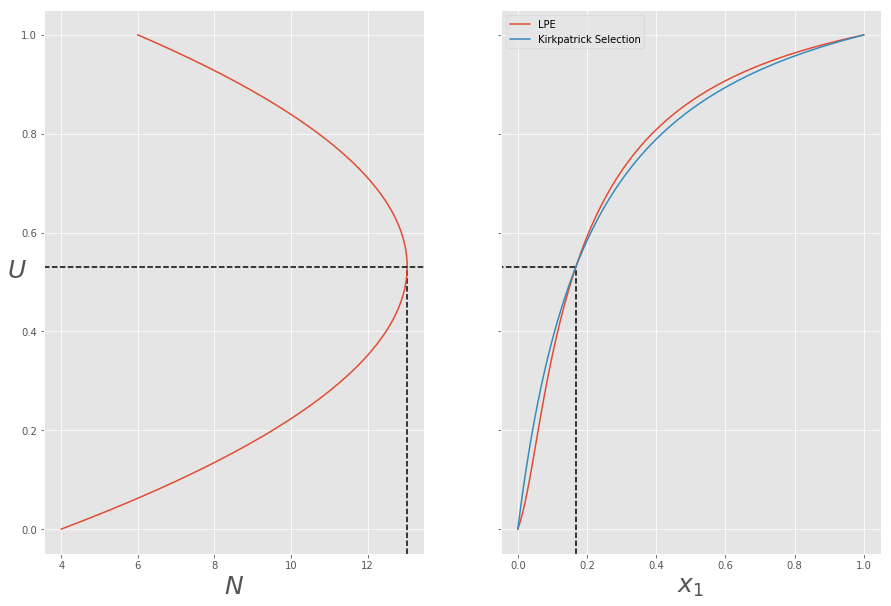

In [49]:
fig = make_plot(20, 3, 2, 1, 5.60606060606061)
fig.savefig("./images/interior-uninvadable-equilibrium.jpg", format="jpg")

# Stability

Necessary and sufficient conditions for stability require that the derivative of the equation of motion with respect to $x_1$ be strictly negative when evaluated at the potential equilibrium.

In [7]:
f1_jac = f1.diff(x1, 1)

In [8]:
f1_jac

(x1*(0.5*(2*P*(-UGA(x1) + 1) + 2*T*UGA(x1))*(-UGA(x1) + 1) + 1.0*(2*R*UGA(x1) + 2*S*(-UGA(x1) + 1))*UGA(x1)) + 0.5*(-x1 + 1)*(2*R*UGA(x1) + 2*S*(-UGA(x1) + 1))*UGA(x1))*(0.5*x1*(2*P*(-UGA(x1) + 1) + 2*T*UGA(x1))*Derivative(UGA(x1), x1) - 0.5*x1*(-2*P*Derivative(UGA(x1), x1) + 2*T*Derivative(UGA(x1), x1))*(-UGA(x1) + 1) - x1*(-0.5*(2*P*(-UGA(x1) + 1) + 2*T*UGA(x1))*Derivative(UGA(x1), x1) + (-2*P*Derivative(UGA(x1), x1) + 2*T*Derivative(UGA(x1), x1))*(-0.5*UGA(x1) + 0.5) + (2.0*R*UGA(x1) + 2.0*S*(-UGA(x1) + 1))*Derivative(UGA(x1), x1) + (2.0*R*Derivative(UGA(x1), x1) - 2.0*S*Derivative(UGA(x1), x1))*UGA(x1)) - (-x1 + 1)*(-1.0*(2*P*(-UGA(x1) + 1) + 2*T*UGA(x1))*Derivative(UGA(x1), x1) + (-2*P*Derivative(UGA(x1), x1) + 2*T*Derivative(UGA(x1), x1))*(-1.0*UGA(x1) + 1.0) + (1.0*R*UGA(x1) + 1.0*S*(-UGA(x1) + 1))*Derivative(UGA(x1), x1) + (1.0*R*Derivative(UGA(x1), x1) - 1.0*S*Derivative(UGA(x1), x1))*UGA(x1)) - (-0.5*x1 + 0.5)*(2*R*UGA(x1) + 2*S*(-UGA(x1) + 1))*Derivative(UGA(x1), x1) - (-0.5

In [50]:
sym.powsimp(sym.cancel(f_jac))

(-8.0*M**2*epsilon*U_prime(x1) - 8.0*M**2*epsilon + 4.0*M**2*U_prime(x1) - 4.0*M**2 - 8.0*M*P*epsilon*UGA(x1)**2*U_prime(x1) + 16.0*M*P*epsilon*UGA(x1)**2 - 32.0*M*P*epsilon*UGA(x1) + 8.0*M*P*epsilon*U_prime(x1) + 16.0*M*P*epsilon + 4.0*M*P*UGA(x1)**2*U_prime(x1) + 8.0*M*P*UGA(x1)**2 - 16.0*M*P*UGA(x1) - 4.0*M*P*U_prime(x1) + 8.0*M*P - 8.0*M*R*epsilon*UGA(x1)**2*U_prime(x1) + 16.0*M*R*epsilon*UGA(x1)**2 + 16.0*M*R*epsilon*UGA(x1)*U_prime(x1) + 4.0*M*R*UGA(x1)**2*U_prime(x1) + 8.0*M*R*UGA(x1)**2 - 8.0*M*R*UGA(x1)*U_prime(x1) + 8.0*M*S*epsilon*UGA(x1)**2*U_prime(x1) - 16.0*M*S*epsilon*UGA(x1)**2 - 16.0*M*S*epsilon*UGA(x1)*U_prime(x1) + 16.0*M*S*epsilon*UGA(x1) + 8.0*M*S*epsilon*U_prime(x1) - 4.0*M*S*UGA(x1)**2*U_prime(x1) - 8.0*M*S*UGA(x1)**2 + 8.0*M*S*UGA(x1)*U_prime(x1) + 8.0*M*S*UGA(x1) - 4.0*M*S*U_prime(x1) + 8.0*M*T*epsilon*UGA(x1)**2*U_prime(x1) - 16.0*M*T*epsilon*UGA(x1)**2 + 16.0*M*T*epsilon*UGA(x1) - 4.0*M*T*UGA(x1)**2*U_prime(x1) - 8.0*M*T*UGA(x1)**2 + 8.0*M*T*UGA(x1) - 8.0*P**

### Equilibrium with $x_1^*=0$

In [26]:
sym.simplify(f_jac.subs({x1: 0}))

-0.500000000000000

Assuming that $M < S < P$ then we have the following stability condition for the equilibrium at $x_1^*=0$.

$$ U_{GA}'(0) < \frac{P-M}{S-M} $$

Note that if $M \ge S$, then the equilibrium at $x_1^*=0$ is always stable.

### Equilibrium with $x_1^* = 1$

In [27]:
sym.simplify(f_jac.subs({x1: 1}))

0.5*(R - T)/(M - R)

$$ U_{GA}'(1) < \frac{R - M}{T - M} $$

### Equilibrium with $0 < x^* < 1$

Sufficient conditions to guarantee the existence of a stable, interior equilibrium are that the stability conditions for both corner equilibria are violated. Necessary and sufficient conditions are more difficult to state...

In [10]:
UGA_prime_star = sym.symbols("UGA_prime_star")
evaluated_f1_jac = f1_jac.subs({sym.Derivative(UGA(x1), x1): UGA_prime_star, UGA(x1): UGA_star, x1: x1_star})

NameError: name 'UGA_star' is not defined

Stability of the equilibrium involves determining whether the following function of $U_{GA}^*$, $U_{GA}^{'*}$ and payoffs $T,R,P,S$ is negative! 

In [29]:
evaluated_f_jac

(0.5*UGA_star*(2*UGA_star*(-M + R) + 2*(-M + S)*(-UGA_star + 1))*(-1.0*(2.0*M*UGA_star - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star)/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star) + 1) + 1.0*(1.0*UGA_star*(2*UGA_star*(-M + R) + 2*(-M + S)*(-UGA_star + 1)) + 0.5*(-UGA_star + 1)*(2*UGA_star*(-M + T) + 2*(-M + P)*(-UGA_star + 1)))*(2.0*M*UGA_star - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star)/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star))*(-0.5*UGA_star*(2*(-M + R)*U_prime(1.0*(2.0*M*UGA_star - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star)/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star)) - 2*(-M + S)*U_prime(1.0*(2.0*M*UGA_star - 2.0*R*UGA_star**2 + 2.0*S*UGA_st

In [30]:
sym.factor(sym.cancel(sym.together(evaluated_f_jac)))

0.5*(1.0*M**2*U_prime(2.0*M*UGA_star/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star) - 2.0*R*UGA_star**2/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star) + 2.0*S*UGA_star**2/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star) - 2.0*S*UGA_star/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star)) - 1.0*M**2 + 1.0*M*P*UGA_star**2*U_prime(2.0*M*UGA_star/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 2.0*S*UGA_star + 2.0*T*UGA_star**2 - 2.0*T*UGA_star) - 2.0*R*UGA_star**2/(2.0*M - 2.0*P*UGA_star**2 + 4.0*P*UGA_star - 2.0*P - 2.0*R*UGA_star**2 + 2.0*S*UGA_star**2 - 

In [31]:
# the above expression can be reduce to a ratio of two, two-dimensional polynomial functions in U and U'...
numerator, denominator = sym.fraction(sym.factor(sym.cancel(sym.together(evaluated_f_jac))))

Can we prove that the denominator is strictly positive? If so, then we have reduced the problem of finding the sign of the Jacobian to finding the sign of the expression in the numerator. Yes!

In [32]:
sym.factor(denominator)

1.0*(1.0*M - 1.0*P*UGA_star**2 + 2.0*P*UGA_star - 1.0*P - 1.0*R*UGA_star**2 + 1.0*S*UGA_star**2 - 1.0*S*UGA_star + 1.0*T*UGA_star**2 - 1.0*T*UGA_star)**2

Now we can solve the numerator for $U'_{GA}(x^*)$.  This will allow us to write the condition for which the Jacobian will be negative as an upper bound on $U'_{GA}(x^*)$.

In [34]:
upper_bound, = sym.solve(numerator, UGA_prime_star)

ValueError: not enough values to unpack (expected 1, got 0)

In [ ]:
sym.factor(upper_bound)

After fiddling around with the above expression we arrive at the following condition for a negative Jacobian and a stable interior equilibrium at $0 < x^* < 1$.

\begin{align}
   % U'_{GA}(x^*) <& \frac{(M - PU_{GA}^{*2} + 2PU_{GA}^* - P - RU_{GA}^{*2} + SU_{GA}^{*2} - SU_{GA}^* + TU_{GA}^{*2} - TU_{GA}^*)^2}{(M^2 + MPU_{GA}^{*2} - MP + MRU_{GA}^{*2} - 2MRU_{GA}^* - MSU_{GA}^{*2} + 2MSU_{GA}^* - MS - MTU_{GA}^{*2} - 2PRU_{GA}^{*2} + 2PRU_{GA}^* + PSU_{GA}^{*2} - 2PSU_{GA}^* + PS + RTU_{GA}^{*2})} \\
   % U'_{GA}(x^*) <& \frac{\bigg(-1(-M + PU_{GA}^{*2} - 2PU_{GA}^* + P + RU_{GA}^{*2} - SU_{GA}^{*2} + SU_{GA}^* - TU_{GA}^{*2} + TU_{GA}^*)\bigg)^2}{(M^2 + MPU_{GA}^{*2} - MP + MRU_{GA}^{*2} - 2MRU_{GA}^* - MSU_{GA}^{*2} + 2MSU_{GA}^* - MS - MTU_{GA}^{*2} - 2PRU_{GA}^{*2} + 2PRU_{GA}^* + PSU_{GA}^{*2} - 2PSU_{GA}^* + PS + RTU_{GA}^{*2})} \\
   % U'_{GA}(x^*) <& \frac{\bigg(\big((R + P) - (T + S)\big)U_{GA}^{*2} + \big((T + S) - 2P\big)U_{GA}^* + \big(P - M\big)\bigg)^2}{MRU_{GA}^{*2} + MPU_{GA}^{*2} - MSU_{GA}^{*2} - MTU_{GA}^{*2} - 2PRU_{GA}^{*2} + PSU_{GA}^{*2} + RTU_{GA}^{*2} - 2MRU_{GA}^* + 2MSU_{GA}^* + 2PRU_{GA}^* - 2PSU_{GA}^* + PS - MS - MP + M^2 }\\
   % U'_{GA}(x^*) <& \frac{\bigg(\big((R + P) - (T + S)\big)U_{GA}^{*2} + \big((T + S) - 2P\big)U_{GA}^* + \big(P - M\big)\bigg)^2}{\bigg(M\big((R + P) - (T + S)\big) + \big(TR + PS - 2RP\big)\bigg)U_{GA}^{*2} + 2(R - S)(P - M)U_{GA}^* + \big(PS - M(P + S) + M^2\big) }\\
    U'_{GA}(x^*) <& \frac{\bigg(\big((R + P) - (T + S)\big)U_{GA}^{*2} + \big((T + S) - 2P\big)U_{GA}^* + \big(P - M\big)\bigg)^2}{\bigg(M\big((R + P) - (T + S)\big) + \big(TR + PS - 2RP\big)\bigg)U_{GA}^{*2} + 2(R - S)(P - M)U_{GA}^* + (P - M)(S - M)}\\
\end{align}

We should be able to recover the stability conditions for the corner equilibria as a special case of the above condition. Recall that $U_{GA}(0) = 0$ and $U_{GA}(1)=1$. When $x^*=0$ the condition reduces to $U'_{GA}(0) < \frac{P - M}{S - M}$ and when $x^*=1$ the condition reduces to $U'_{GA}(1) < \frac{R - M}{T - M}$.

Can also use a graphical approach to check the correctness of the above condition.  The above condition should be the zero contour in a contour plot of the value of the Jacobian as a function of $U_{GA}$ and $U'_{GA}$.

In [ ]:
# vectorized numerical function created from our symbolic expression
_numeric_f_jac = sym.lambdify((UGA_star, UGA_prime_star, T, R, P, S, M), evaluated_f_jac, modules="numpy")

In [ ]:
def plot_jacobian(T, R, P, S, M):

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
    ax.set_title(r"Negative values of $\frac{\partial \dot{x}_1}{\partial x_1}$ indicate stability!", fontsize=25)
    ax.grid("off")

    equilibrium_selection_probs = np.linspace(0, 1, 100).reshape(-1, 1)
    equilibrium_selection_derivs = np.linspace(0, 10, 1000).reshape(1, -1) # sensible UGA'(0) >= 1
    Z = _numeric_f_jac(equilibrium_selection_probs, equilibrium_selection_derivs, T, R, P, S, M)
    cax = ax.imshow(Z, origin="lower", aspect="auto", vmin=-0.5, vmax=1.0)

    levels = np.arange(-0.25, 1.25, 0.25)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 10, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.linspace(0, 1, locs.size-1))

    plt.show()

In [ ]:
mpld3.disable_notebook()  # don't need interactive plotting for this!

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

M_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$M$")

w = widgets.interactive(plot_jacobian, T=T_slider, R=R_slider, P=P_slider, S=S_slider, M=M_slider)
display(w)

# Invadability

Restrict the full model to obtain a monomorphic $\gamma$ equilibrium, add a small amount of individuals carrying the $g$ allele of the $\gamma$ gene and simulate.

In [128]:
W = models.generalized_sexual_selection(x, UGA, UgA, payoff_kernel, 0, 0, 0)
(f1,), (f2,), (f3,), _ = models.offspring_genotypes_evolution(W, x)

In [129]:
F = sym.Matrix([f1, f2, f3])

In [142]:
equilibrium_x1, = sym.solve(sym.factor(f1.subs({x2: 1 - x1, x3: 0}), UGA(x1), x1), x1, implicit=True)

In [143]:
F_jac = F.jacobian([x1, x2, x3]).subs({x2: 1 - x1, x3: 0}).subs({x1: equilibrium_x1}).doit()

In [144]:
F_jac[0, 0]

(0.5*(2*R*UGA((R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1))/(P*UGA(x1)**2 - 2.0*P*UGA(x1) + P + R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1) - T*UGA(x1)**2 + T*UGA(x1))) + 2*S*(-UGA((R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1))/(P*UGA(x1)**2 - 2.0*P*UGA(x1) + P + R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1) - T*UGA(x1)**2 + T*UGA(x1))) + 1))*(-(R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1))/(P*UGA(x1)**2 - 2.0*P*UGA(x1) + P + R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1) - T*UGA(x1)**2 + T*UGA(x1)) + 1)*UGA((R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1))/(P*UGA(x1)**2 - 2.0*P*UGA(x1) + P + R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1) - T*UGA(x1)**2 + T*UGA(x1))) + (0.5*(2*P*(-UGA((R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1))/(P*UGA(x1)**2 - 2.0*P*UGA(x1) + P + R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1) - T*UGA(x1)**2 + T*UGA(x1))) + 1) + 2*T*UGA((R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1))/(P*UGA(x1)**2 - 2.0*P*UGA(x1) + P + R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA(x1) - T*UGA(x1)**2 + T*UGA(x1))))*(-UGA((R*UGA(x1)**2 - S*UGA(x1)**2 + S*UGA

In [186]:
F = sym.Matrix([(sym.factor(sym.together(f1 + x1), UGA(x1 + x3), UgA(x1 + x3), x1, x2, x3, epsilon)
                    .subs({(-0.5*M*x1 - 0.5*M*x2 + 0.5*P + x1*(-1.0*P + 0.5*S + 0.5*T)*UGA(x1 + x3) + x1*(1.0*P - 0.5*S - 0.5*T)*UgA(x1 + x3) + x1*(-0.5*P - 0.5*R + 0.5*S + 0.5*T)*UgA(x1 + x3)**2 + x1*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1 + x3)**2 + x2*(-1.0*P + 0.5*S + 0.5*T)*UGA(x1 + x3) + x2*(1.0*P - 0.5*S - 0.5*T)*UgA(x1 + x3) + x2*(-0.5*P - 0.5*R + 0.5*S + 0.5*T)*UgA(x1 + x3)**2 + x2*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1 + x3)**2 + (-1.0*P + 0.5*S + 0.5*T)*UgA(x1 + x3) + (0.5*P + 0.5*R - 0.5*S - 0.5*T)*UgA(x1 + x3)**2): 0.25 * N(x1, x2, x3)}) - x1),
                (sym.factor(sym.together(f2 + x2), UGA(x1 + x3), UgA(x1 + x3), x1, x2, x3, epsilon)
                    .subs({(-0.5*M*x1 - 0.5*M*x2 + 0.5*P + x1*(-1.0*P + 0.5*S + 0.5*T)*UGA(x1 + x3) + x1*(1.0*P - 0.5*S - 0.5*T)*UgA(x1 + x3) + x1*(-0.5*P - 0.5*R + 0.5*S + 0.5*T)*UgA(x1 + x3)**2 + x1*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1 + x3)**2 + x2*(-1.0*P + 0.5*S + 0.5*T)*UGA(x1 + x3) + x2*(1.0*P - 0.5*S - 0.5*T)*UgA(x1 + x3) + x2*(-0.5*P - 0.5*R + 0.5*S + 0.5*T)*UgA(x1 + x3)**2 + x2*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1 + x3)**2 + (-1.0*P + 0.5*S + 0.5*T)*UgA(x1 + x3) + (0.5*P + 0.5*R - 0.5*S - 0.5*T)*UgA(x1 + x3)**2): 0.25 * N(x1, x2, x3)}) - x2),
                (sym.factor(sym.together(f3 + x3), UGA(x1 + x3), UgA(x1 + x3), x1, x2, x3, epsilon)
                    .subs({(-0.5*M*x1 - 0.5*M*x2 + 0.5*P + x1*(-1.0*P + 0.5*S + 0.5*T)*UGA(x1 + x3) + x1*(1.0*P - 0.5*S - 0.5*T)*UgA(x1 + x3) + x1*(-0.5*P - 0.5*R + 0.5*S + 0.5*T)*UgA(x1 + x3)**2 + x1*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1 + x3)**2 + x2*(-1.0*P + 0.5*S + 0.5*T)*UGA(x1 + x3) + x2*(1.0*P - 0.5*S - 0.5*T)*UgA(x1 + x3) + x2*(-0.5*P - 0.5*R + 0.5*S + 0.5*T)*UgA(x1 + x3)**2 + x2*(0.5*P + 0.5*R - 0.5*S - 0.5*T)*UGA(x1 + x3)**2 + (-1.0*P + 0.5*S + 0.5*T)*UgA(x1 + x3) + (0.5*P + 0.5*R - 0.5*S - 0.5*T)*UgA(x1 + x3)**2): 0.25 * N(x1, x2, x3)}) - x3)])

In [200]:
N_star = sym.symbols("N_star", real=True, positive=True)

In [202]:
x1_star.subs({(-M + P*U_star**2 - 2.0*P*U_star + P + R*U_star**2 - S*U_star**2 + S*U_star - T*U_star**2 + T*U_star): 0.5 * N_star})

2.0*(2.0*M*U_star*epsilon - M*U_star - 2.0*M*epsilon + 2.0*P*U_star**2*epsilon - 4.0*P*U_star*epsilon + 2.0*P*epsilon + R*U_star**2 - S*U_star**2 + S*U_star - 2.0*T*U_star**2*epsilon + 2.0*T*U_star*epsilon)/(N_star*(2.0*epsilon + 1.0))

In [203]:
F_jac = (F.jacobian([x1, x2, x3])
          .subs({N(x1, x2, x3): N_star})
          .subs({x2: 1 - x1, x3: 0})
          .subs({UGA(x1): UGA_star, UgA(x1): UgA_star})
          .doit()
          .subs({sym.Derivative(UGA(x1), x1): UGA_prime_star})
          .subs({x1: x1_star.subs({(-M + P*U_star**2 - 2.0*P*U_star + P + R*U_star**2 - S*U_star**2 + S*U_star - T*U_star**2 + T*U_star): 0.5 * N_star}).subs({U_star: UGA_star})}))

In [205]:
F_jac[0,0].simplify()

1.0*(128.0*M**2*N_star*UGA_prime_star*UGA_star*epsilon**3 - 64.0*M**2*N_star*UGA_prime_star*UGA_star*epsilon**2 - 32.0*M**2*N_star*UGA_prime_star*UGA_star*epsilon + 16.0*M**2*N_star*UGA_prime_star*UGA_star - 128.0*M**2*N_star*UGA_prime_star*epsilon**3 + 32.0*M**2*N_star*UGA_prime_star*epsilon + 192.0*M**2*N_star*UGA_star**2*epsilon**3 - 96.0*M**2*N_star*UGA_star**2*epsilon**2 - 48.0*M**2*N_star*UGA_star**2*epsilon + 24.0*M**2*N_star*UGA_star**2 - 256.0*M**2*N_star*UGA_star*epsilon**3 - 32.0*M**2*N_star*UGA_star*epsilon**2 + 64.0*M**2*N_star*UGA_star*epsilon + 8.0*M**2*N_star*UGA_star + 64.0*M**2*N_star*epsilon**3 + 64.0*M**2*N_star*epsilon**2 + 16.0*M**2*N_star*epsilon - 512.0*M**2*P*UGA_prime_star*UGA_star**3*epsilon**3 + 768.0*M**2*P*UGA_prime_star*UGA_star**3*epsilon**2 - 384.0*M**2*P*UGA_prime_star*UGA_star**3*epsilon + 64.0*M**2*P*UGA_prime_star*UGA_star**3 + 1536.0*M**2*P*UGA_prime_star*UGA_star**2*epsilon**3 - 1792.0*M**2*P*UGA_prime_star*UGA_star**2*epsilon**2 + 640.0*M**2*P*UG

In [127]:
sym.factor(-0.25*M*epsilon*x1**2*x2 + 0.25*M*epsilon*x1*x2**2 - 0.5*M*epsilon*x1*x2*x3 + 0.25*M*epsilon*x1*x2 + 0.25*M*epsilon*x2**2*x3 - 0.25*M*epsilon*x2*x3**2 + 0.25*M*epsilon*x2*x3 - 0.125*M*x1**3 + 0.125*M*x1**2*x2 - 0.25*M*x1**2*x3 + 0.125*M*x1**2 + 0.125*M*x1*x2*x3 - 0.125*M*x1*x3**2 + 0.125*M*x1*x3 + 0.5*P*epsilon*x1**2*x2 + 1.0*P*epsilon*x1*x2*x3 - 0.5*P*epsilon*x1*x2 + 0.5*P*epsilon*x2*x3**2 - 0.5*P*epsilon*x2*x3 + 0.125*P*x1**3 - 0.125*P*x1**2*x2 + 0.25*P*x1**2*x3 - 0.125*P*x1**2 - 0.25*P*x1*x2*x3 + 0.125*P*x1*x3**2 - 0.125*P*x1*x3 - 0.125*P*x2*x3**2, epsilon)

(-0.5*x1 - 0.5*x3)*(0.25*M*x1**2 - 0.25*M*x1*x2 + 0.25*M*x1*x3 - 0.25*M*x1 - 0.25*P*x1**2 + 0.25*P*x1*x2 - 0.25*P*x1*x3 + 0.25*P*x1 + 0.25*P*x2*x3 + epsilon*(0.5*M*x1*x2 - 0.5*M*x2**2 + 0.5*M*x2*x3 - 0.5*M*x2 - 1.0*P*x1*x2 - 1.0*P*x2*x3 + 1.0*P*x2))

In [122]:
sym.factor(0.5*M*epsilon*x1**3 + 0.25*M*epsilon*x1**2*x2 + 0.75*M*epsilon*x1**2*x3 - 0.5*M*epsilon*x1**2 - 0.25*M*epsilon*x1*x2**2 + 0.5*M*epsilon*x1*x2*x3 - 0.25*M*epsilon*x1*x2 + 0.25*M*epsilon*x1*x3**2 - 0.25*M*epsilon*x1*x3 - 0.25*M*epsilon*x2**2*x3 + 0.25*M*epsilon*x2*x3**2 - 0.25*M*epsilon*x2*x3 - 0.375*M*x1**3 - 0.375*M*x1**2*x2 - 0.5*M*x1**2*x3 + 0.375*M*x1**2 - 0.5*M*x1*x2*x3 + 0.25*M*x1*x2 - 0.125*M*x1*x3**2 + 0.125*M*x1*x3 - 0.125*M*x2*x3**2 + 0.125*M*x2*x3 - 0.5*P*epsilon*x1**2*x2 + 0.5*P*epsilon*x1*x2**2 - 1.0*P*epsilon*x1*x2*x3 + 0.5*P*epsilon*x1*x2 + 0.5*P*epsilon*x2**2*x3 - 0.5*P*epsilon*x2*x3**2 + 0.5*P*epsilon*x2*x3 - 0.25*P*x1**3 + 0.25*P*x1**2*x2 - 0.5*P*x1**2*x3 + 0.25*P*x1**2 + 0.25*P*x1*x2*x3 - 0.25*P*x1*x3**2 + 0.25*P*x1*x3 - 0.5*S*epsilon*x1**3 - 0.75*S*epsilon*x1**2*x3 + 0.5*S*epsilon*x1**2 - 0.25*S*epsilon*x1*x3**2 + 0.25*S*epsilon*x1*x3 + 0.5*S*x1**3 + 0.25*S*x1**2*x2 + 0.75*S*x1**2*x3 - 0.5*S*x1**2 + 0.375*S*x1*x2*x3 - 0.25*S*x1*x2 + 0.25*S*x1*x3**2 - 0.25*S*x1*x3 + 0.125*S*x2*x3**2 - 0.125*S*x2*x3 + 0.25*T*epsilon*x1**2*x2 - 0.25*T*epsilon*x1*x2**2 + 0.5*T*epsilon*x1*x2*x3 - 0.25*T*epsilon*x1*x2 - 0.25*T*epsilon*x2**2*x3 + 0.25*T*epsilon*x2*x3**2 - 0.25*T*epsilon*x2*x3 + 0.125*T*x1**3 - 0.125*T*x1**2*x2 + 0.25*T*x1**2*x3 - 0.125*T*x1**2 - 0.125*T*x1*x2*x3 + 0.125*T*x1*x3**2 - 0.125*T*x1*x3, epsilon, x1, x2, x3)

1.0*(epsilon*x1**3*(0.5*M - 0.5*S) + epsilon*x1**2*x2*(0.25*M - 0.5*P + 0.25*T) + epsilon*x1**2*x3*(0.75*M - 0.75*S) + epsilon*x1**2*(-0.5*M + 0.5*S) + epsilon*x1*x2**2*(-0.25*M + 0.5*P - 0.25*T) + epsilon*x1*x2*x3*(0.5*M - 1.0*P + 0.5*T) + epsilon*x1*x2*(-0.25*M + 0.5*P - 0.25*T) + epsilon*x1*x3**2*(0.25*M - 0.25*S) + epsilon*x1*x3*(-0.25*M + 0.25*S) + epsilon*x2**2*x3*(-0.25*M + 0.5*P - 0.25*T) + epsilon*x2*x3**2*(0.25*M - 0.5*P + 0.25*T) + epsilon*x2*x3*(-0.25*M + 0.5*P - 0.25*T) + x1**3*(-0.375*M - 0.25*P + 0.5*S + 0.125*T) + x1**2*x2*(-0.375*M + 0.25*P + 0.25*S - 0.125*T) + x1**2*x3*(-0.5*M - 0.5*P + 0.75*S + 0.25*T) + x1**2*(0.375*M + 0.25*P - 0.5*S - 0.125*T) + x1*x2*x3*(-0.5*M + 0.25*P + 0.375*S - 0.125*T) + x1*x2*(0.25*M - 0.25*S) + x1*x3**2*(-0.125*M - 0.25*P + 0.25*S + 0.125*T) + x1*x3*(0.125*M + 0.25*P - 0.25*S - 0.125*T) + x2*x3**2*(-0.125*M + 0.125*S) + x2*x3*(0.125*M - 0.125*S))

In [117]:
sym.factor((-4.0*x1**2 - 8.0*x1*x3 + 4.0*x1 - 4.0*x3**2 + 4.0*x3))

-4.0*(1.0*x1 + 1.0*x3)*(1.0*x1 + 1.0*x3 - 1.0)

In [133]:
f1 = (sym.factor(sym.together(f1), UGA(x1 + x3), UgA(x1 + x3))
         .subs({-0.5*M*x1 - 0.5*M*x2 + 0.5*P + (-1.0*P*x1 - 1.0*P*x2 + 0.5*S*x1 + 0.5*S*x2 + 0.5*T*x1 + 0.5*T*x2)*UGA(x1 + x3) + (0.5*P*x1 + 0.5*P*x2 + 0.5*R*x1 + 0.5*R*x2 - 0.5*S*x1 - 0.5*S*x2 - 0.5*T*x1 - 0.5*T*x2)*UGA(x1 + x3)**2 + (1.0*P*x1 + 1.0*P*x2 - 1.0*P - 0.5*S*x1 - 0.5*S*x2 + 0.5*S - 0.5*T*x1 - 0.5*T*x2 + 0.5*T)*UgA(x1 + x3) + (-0.5*P*x1 - 0.5*P*x2 + 0.5*P - 0.5*R*x1 - 0.5*R*x2 + 0.5*R + 0.5*S*x1 + 0.5*S*x2 - 0.5*S + 0.5*T*x1 + 0.5*T*x2 - 0.5*T)*UgA(x1 + x3)**2: N}))
f2 = (sym.factor(sym.together(f2), UGA(x1 + x3), UgA(x1 + x3))
         .subs({-0.5*M*x1 - 0.5*M*x2 + 0.5*P + (-1.0*P*x1 - 1.0*P*x2 + 0.5*S*x1 + 0.5*S*x2 + 0.5*T*x1 + 0.5*T*x2)*UGA(x1 + x3) + (0.5*P*x1 + 0.5*P*x2 + 0.5*R*x1 + 0.5*R*x2 - 0.5*S*x1 - 0.5*S*x2 - 0.5*T*x1 - 0.5*T*x2)*UGA(x1 + x3)**2 + (1.0*P*x1 + 1.0*P*x2 - 1.0*P - 0.5*S*x1 - 0.5*S*x2 + 0.5*S - 0.5*T*x1 - 0.5*T*x2 + 0.5*T)*UgA(x1 + x3) + (-0.5*P*x1 - 0.5*P*x2 + 0.5*P - 0.5*R*x1 - 0.5*R*x2 + 0.5*R + 0.5*S*x1 + 0.5*S*x2 - 0.5*S + 0.5*T*x1 + 0.5*T*x2 - 0.5*T)*UgA(x1 + x3)**2: N}))
f3 = (sym.factor(sym.together(f3), UGA(x1 + x3), UgA(x1 + x3))
         .subs({-0.5*M*x1 - 0.5*M*x2 + 0.5*P + (-1.0*P*x1 - 1.0*P*x2 + 0.5*S*x1 + 0.5*S*x2 + 0.5*T*x1 + 0.5*T*x2)*UGA(x1 + x3) + (0.5*P*x1 + 0.5*P*x2 + 0.5*R*x1 + 0.5*R*x2 - 0.5*S*x1 - 0.5*S*x2 - 0.5*T*x1 - 0.5*T*x2)*UGA(x1 + x3)**2 + (1.0*P*x1 + 1.0*P*x2 - 1.0*P - 0.5*S*x1 - 0.5*S*x2 + 0.5*S - 0.5*T*x1 - 0.5*T*x2 + 0.5*T)*UgA(x1 + x3) + (-0.5*P*x1 - 0.5*P*x2 + 0.5*P - 0.5*R*x1 - 0.5*R*x2 + 0.5*R + 0.5*S*x1 + 0.5*S*x2 - 0.5*S + 0.5*T*x1 + 0.5*T*x2 - 0.5*T)*UgA(x1 + x3)**2: N}))


In [131]:
N = sym.function('N')
f1 = f1.subs({-0.5*M*x1 - 0.5*M*x2 + 0.5*P + (-1.0*P*x1 - 1.0*P*x2 + 0.5*S*x1 + 0.5*S*x2 + 0.5*T*x1 + 0.5*T*x2)*UGA(x1 + x3) + (0.5*P*x1 + 0.5*P*x2 + 0.5*R*x1 + 0.5*R*x2 - 0.5*S*x1 - 0.5*S*x2 - 0.5*T*x1 - 0.5*T*x2)*UGA(x1 + x3)**2 + (1.0*P*x1 + 1.0*P*x2 - 1.0*P - 0.5*S*x1 - 0.5*S*x2 + 0.5*S - 0.5*T*x1 - 0.5*T*x2 + 0.5*T)*UgA(x1 + x3) + (-0.5*P*x1 - 0.5*P*x2 + 0.5*P - 0.5*R*x1 - 0.5*R*x2 + 0.5*R + 0.5*S*x1 + 0.5*S*x2 - 0.5*S + 0.5*T*x1 + 0.5*T*x2 - 0.5*T)*UgA(x1 + x3)**2: N})
f2 = f2.subs({-0.5*M*x1 - 0.5*M*x2 + 0.5*P + (-1.0*P*x1 - 1.0*P*x2 + 0.5*S*x1 + 0.5*S*x2 + 0.5*T*x1 + 0.5*T*x2)*UGA(x1 + x3) + (0.5*P*x1 + 0.5*P*x2 + 0.5*R*x1 + 0.5*R*x2 - 0.5*S*x1 - 0.5*S*x2 - 0.5*T*x1 - 0.5*T*x2)*UGA(x1 + x3)**2 + (1.0*P*x1 + 1.0*P*x2 - 1.0*P - 0.5*S*x1 - 0.5*S*x2 + 0.5*S - 0.5*T*x1 - 0.5*T*x2 + 0.5*T)*UgA(x1 + x3) + (-0.5*P*x1 - 0.5*P*x2 + 0.5*P - 0.5*R*x1 - 0.5*R*x2 + 0.5*R + 0.5*S*x1 + 0.5*S*x2 - 0.5*S + 0.5*T*x1 + 0.5*T*x2 - 0.5*T)*UgA(x1 + x3)**2: N})
f3 = f3.subs({-0.5*M*x1 - 0.5*M*x2 + 0.5*P + (-1.0*P*x1 - 1.0*P*x2 + 0.5*S*x1 + 0.5*S*x2 + 0.5*T*x1 + 0.5*T*x2)*UGA(x1 + x3) + (0.5*P*x1 + 0.5*P*x2 + 0.5*R*x1 + 0.5*R*x2 - 0.5*S*x1 - 0.5*S*x2 - 0.5*T*x1 - 0.5*T*x2)*UGA(x1 + x3)**2 + (1.0*P*x1 + 1.0*P*x2 - 1.0*P - 0.5*S*x1 - 0.5*S*x2 + 0.5*S - 0.5*T*x1 - 0.5*T*x2 + 0.5*T)*UgA(x1 + x3) + (-0.5*P*x1 - 0.5*P*x2 + 0.5*P - 0.5*R*x1 - 0.5*R*x2 + 0.5*R + 0.5*S*x1 + 0.5*S*x2 - 0.5*S + 0.5*T*x1 + 0.5*T*x2 - 0.5*T)*UgA(x1 + x3)**2: N})


In [135]:
sym.function?

In [108]:
sym.factor(f1, UGA(x1 + x3), UgA(x1 + x3), x1)

-3.0*(-0.0833333333333333*M*epsilon*x2**2*x3 + 0.0833333333333333*M*epsilon*x2*x3**2 - 0.0833333333333333*M*epsilon*x2*x3 - 0.166666666666667*M*x1**4 - 0.166666666666667*P*epsilon*x2*x3**2 + 0.166666666666667*P*epsilon*x2*x3 + 0.0416666666666667*P*x2*x3**2 + x1**4*(-0.333333333333333*P + 0.166666666666667*S + 0.166666666666667*T)*UGA(x1 + x3) + x1**4*(0.333333333333333*P - 0.166666666666667*S - 0.166666666666667*T)*UgA(x1 + x3) + x1**4*(-0.166666666666667*P - 0.166666666666667*R + 0.166666666666667*S + 0.166666666666667*T)*UgA(x1 + x3)**2 + x1**4*(0.166666666666667*P + 0.166666666666667*R - 0.166666666666667*S - 0.166666666666667*T)*UGA(x1 + x3)**2 + x1**3*(-0.166666666666667*M*x2 - 0.333333333333333*M*x3 + 0.208333333333333*M + 0.125*P) + x1**3*(0.333333333333333*P*x2 + 0.666666666666667*P*x3 - 0.666666666666667*P - 0.166666666666667*S*x2 - 0.333333333333333*S*x3 + 0.375*S - 0.166666666666667*T*x2 - 0.333333333333333*T*x3 + 0.333333333333333*T)*UgA(x1 + x3) + x1**3*(-0.166666666666667

In [105]:
sym.factor(f1, UGA(x1 + x3), UgA(x1 + x3), epsilon)

12.0*(-0.166666666666667*M*x1**4 - 0.166666666666667*M*x1**3*x2 - 0.333333333333333*M*x1**3*x3 + 0.208333333333333*M*x1**3 - 0.333333333333333*M*x1**2*x2*x3 + 0.125*M*x1**2*x2 - 0.166666666666667*M*x1**2*x3**2 + 0.25*M*x1**2*x3 - 0.0416666666666667*M*x1**2 - 0.166666666666667*M*x1*x2*x3**2 + 0.125*M*x1*x2*x3 + 0.0416666666666667*M*x1*x3**2 - 0.0416666666666667*M*x1*x3 + 0.125*P*x1**3 + 0.0416666666666667*P*x1**2*x2 + 0.25*P*x1**2*x3 - 0.125*P*x1**2 + 0.0833333333333333*P*x1*x2*x3 + 0.125*P*x1*x3**2 - 0.125*P*x1*x3 + 0.0416666666666667*P*x2*x3**2 + epsilon*(0.0833333333333333*M*x1**2*x2 - 0.0833333333333333*M*x1*x2**2 + 0.166666666666667*M*x1*x2*x3 - 0.0833333333333333*M*x1*x2 - 0.0833333333333333*M*x2**2*x3 + 0.0833333333333333*M*x2*x3**2 - 0.0833333333333333*M*x2*x3 - 0.166666666666667*P*x1**2*x2 - 0.333333333333333*P*x1*x2*x3 + 0.166666666666667*P*x1*x2 - 0.166666666666667*P*x2*x3**2 + 0.166666666666667*P*x2*x3) + epsilon*(0.166666666666667*P*x1**2*x2 + 0.166666666666667*P*x1*x2**2 +

In [134]:
f2.subs({x2: 1 - x1, x3:0 })

9.0*(-0.111111111111111*M*epsilon*x1**2*(-x1 + 1) + 0.111111111111111*M*epsilon*x1*(-x1 + 1)**2 + 0.111111111111111*M*epsilon*x1*(-x1 + 1) - 0.222222222222222*M*x1**3*(-x1 + 1) + 0.0555555555555556*M*x1**3 - 0.222222222222222*M*x1**2*(-x1 + 1)**2 + 0.277777777777778*M*x1**2*(-x1 + 1) - 0.0555555555555556*M*x1**2 + 0.111111111111111*M*x1*(-x1 + 1)**2 - 0.111111111111111*M*x1*(-x1 + 1) + 0.222222222222222*P*epsilon*x1**2*(-x1 + 1) - 0.222222222222222*P*epsilon*x1*(-x1 + 1) - 0.0555555555555556*P*x1**3 + 0.0555555555555556*P*x1**2*(-x1 + 1) + 0.0555555555555556*P*x1**2 + (-0.222222222222222*P*epsilon*x1**2*(-x1 + 1) - 0.222222222222222*P*epsilon*x1*(-x1 + 1)**2 + 0.222222222222222*P*epsilon*x1*(-x1 + 1) + 0.444444444444444*P*x1**3*(-x1 + 1) + 0.444444444444444*P*x1**2*(-x1 + 1)**2 - 0.666666666666667*P*x1**2*(-x1 + 1) - 0.222222222222222*P*x1*(-x1 + 1)**2 + 0.222222222222222*P*x1*(-x1 + 1) - 0.222222222222222*S*x1**3*(-x1 + 1) + 0.0555555555555556*S*x1**3 - 0.222222222222222*S*x1**2*(-x1 

In [48]:
F = sym.Matrix([f1, f2, f3])

In [49]:
F_jac = F.jacobian([x1, x2, x3])

In [50]:
UGA_star, UgA_star = sym.symbols("UGA_star, UgA_star", nonnegative=True, real=True)
UGA_prime_star = sym.symbols("UGA_prime_star", real=True)

evaluated_F_jac = (F_jac.subs({x2: 1 - x1, x3: 0})
                        .subs({UGA(x1): UGA_star, UgA(x1): UgA_star})
                        .doit()
                        .subs({sym.Derivative(UGA(x1), x1): UGA_prime_star})
                        .subs({x1: x1_star.subs({U_star: UGA_star})}))

In [58]:
N_G = sym.symbols("N_G", nonnegative=True, real=True)

In [61]:
sym.factor(2.0*M*UGA_star*epsilon - M*UGA_star - 2.0*M*epsilon + 2.0*P*UGA_star**2*epsilon - 4.0*P*UGA_star*epsilon + 2.0*P*epsilon + R*UGA_star**2 - S*UGA_star**2 + S*UGA_star - 2.0*T*UGA_star**2*epsilon + 2.0*T*UGA_star*epsilon, UGA_star)

4.0*(-0.5*M*epsilon + 0.5*P*epsilon + UGA_star**2*(0.5*P*epsilon + 0.25*R - 0.25*S - 0.5*T*epsilon) + UGA_star*(0.5*M*epsilon - 0.25*M - 1.0*P*epsilon + 0.25*S + 0.5*T*epsilon))

In [63]:
n, d = sym.fraction(sym.together(evaluated_F_jac[0,0].subs({(-M + P*UGA_star**2 - 2.0*P*UGA_star + P + R*UGA_star**2 - S*UGA_star**2 + S*UGA_star - T*UGA_star**2 + T*UGA_star): 0.5 * N_G})))

In [72]:
sym.factor(sym.expand(n), N_G, UGA_star, UgA_star)

N_G*(-20736.0*epsilon - 10368.0)*(0.00617283950617284*M**4*epsilon**3 - 0.00308641975308642*M**4*epsilon**2 - 0.0185185185185185*M**3*P*epsilon**3 + 0.00925925925925926*M**3*P*epsilon**2 + 0.0185185185185185*M**2*P**2*epsilon**3 - 0.00925925925925926*M**2*P**2*epsilon**2 - 0.00617283950617284*M*P**3*epsilon**3 + 0.00308641975308642*M*P**3*epsilon**2 + N_G**2*UGA_star**4*(0.000771604938271605*P**2*epsilon**3 + 0.00154320987654321*P**2*epsilon**2 + 0.000964506172839506*P**2*epsilon + 0.000192901234567901*P**2 + 0.00231481481481481*P*R*epsilon**3 + 0.00385802469135802*P*R*epsilon**2 + 0.00212191358024691*P*R*epsilon + 0.000385802469135802*P*R - 0.00231481481481481*P*S*epsilon**3 - 0.00385802469135802*P*S*epsilon**2 - 0.00212191358024691*P*S*epsilon - 0.000385802469135802*P*S - 0.00154320987654321*P*T*epsilon**3 - 0.00308641975308642*P*T*epsilon**2 - 0.00192901234567901*P*T*epsilon - 0.000385802469135802*P*T + 0.00154320987654321*R**2*epsilon**3 + 0.00231481481481481*R**2*epsilon**2 + 0.00

In [69]:
sym.factor(sym.expand(d), UGA_star)

N_G**2*(-512.0*epsilon**2 - 512.0*epsilon - 128.0)*(-0.5*M + 0.5*P + UGA_star**2*(0.5*P + 0.5*R - 0.5*S - 0.5*T) + UGA_star*(-1.0*P + 0.5*S + 0.5*T))**2*(-0.5*M*epsilon - 0.25*N_G*epsilon - 0.125*N_G + 0.5*P*epsilon + UGA_star**2*(0.5*P*epsilon + 0.25*R - 0.25*S - 0.5*T*epsilon) + UGA_star*(0.5*M*epsilon - 0.25*M - 1.0*P*epsilon + 0.25*S + 0.5*T*epsilon))

In [56]:
result = sym.factor(sym.expand(sym.together(evaluated_F_jac[0,0]))

KeyboardInterrupt: 

In [56]:
simplified_F_jac = sym.zeros(3, 3)

for i in range(3):
    for j in range(3):
        simplified_F_jac[i, j] = sym.factor(sym.cancel(sym.together(evaluated_F_jac[i, j])))
        print("Finished with element {},{}!".format(i,j))
        

Finished with element 0,0!
Finished with element 0,1!
Finished with element 0,2!
Finished with element 1,0!
Finished with element 1,1!
Finished with element 1,2!
Finished with element 2,0!
Finished with element 2,1!
Finished with element 2,2!


In [57]:
eigenvals = simplified_F_jac.eigenvals()

KeyboardInterrupt: 

In [ ]:
e1, e2, e3 = eigenvals.keys()

In [ ]:
e1

In [ ]:
sym.factor(e1)

First eigenvalue can be written as a hyperbola in $U_{gA}^*,U_{GA}^*$ plane.

$$ e_1 = \left(\frac{\big((R + P) - (T + S)\big)U_{gA}^{*2} + \big((T + S) - 2P\big)U_{gA}^*}{N^*}\right) - \left(\frac{\big((R + P) - (T + S)\big)U_{GA}^{*2} + \big((T + S) - 2P\big)U_{GA}^*}{N^*}\right) $$

### Completing the square

To write this hyperbola in standard form we need to [complete the square](https://en.wikipedia.org/wiki/Completing_the_square). Completing the square for the quadratic polynomial in $U_{GA}(x^*)$ yields the following.

\begin{align}
    \big((R + P) - (T + S)\big)\left(U_{GA}^* - \bar{U}_{GA}^*\right)^2 - \frac{1}{2}\big(\bar{N}^* - 2P\big) \\
\end{align}

where $\bar{U}_{GA}^*$ is the value of $U_{GA}^*$ that maximizes total offspring $N$ derived above. Completing the square for the quadratic polynomial in $U_{gA}(x^*)$ yields a similar expression.

\begin{align}
    \big((R + P) - (T + S)\big)\left(U_{gA}^* - \bar{U}_{GA}^*\right)^2 - \frac{1}{2}\big(\bar{N}^* - 2P\big) \\
\end{align}

Substituting these results into the expression for the eigenvalue yields the following.

$$ e_1 = \left(\frac{\big(U_{gA}^* - \bar{U}_{GA}^*\big)^{2}}{\frac{N^*}{\big((R + P) - (T + S)\big)}}\right) - \left(\frac{\big(U_{GA}^* - \bar{U}_{GA}^*\big)^{2}}{\frac{N^*}{\big((R + P) - (T + S)\big)}}\right) $$


### Conditions for negative eigenvalue

Non-invadability requires that this eigenvalue is strictly negative.

$$ \left(\frac{\big(U_{gA}^* - \bar{U}_{GA}^*\big)^{2}}{\frac{N^*}{\big((R + P) - (T + S)\big)}}\right) - \left(\frac{\big(U_{GA}^* - \bar{U}_{GA}^*\big)^{2}}{\frac{N^*}{\big((R + P) - (T + S)\big)}}\right) < 0$$

#### Case: (R + P) < (T + S)
In this case the inequality simplifies to the following.

$$ \big(U_{gA}^* - \bar{U}_{GA}^*\big)^{2} - \big(U_{GA}^* - \bar{U}_{GA}^*\big)^{2} > 0 $$

This implies that we have four sub-cases to consider.

\begin{align}
    \big(U_{gA}^* - \bar{U}_{GA}^*\big) >& \big(U_{GA}^* - \bar{U}_{GA}^*\big) \\
    \big(U_{gA}^* - \bar{U}_{GA}^*\big) >& -\big(U_{GA}^* - \bar{U}_{GA}^*\big) \\
    -\big(U_{gA}^* - \bar{U}_{GA}^*\big) >& \big(U_{GA}^* - \bar{U}_{GA}^*\big) \\
    -\big(U_{gA}^* - \bar{U}_{GA}^*\big) >& -\big(U_{GA}^* - \bar{U}_{GA}^*\big)
\end{align}

These four sub-cases define the following two regions of the $U_{gA}^*,U_{GA}^*$ plane where the eigenvalue is negative.

\begin{align}
   & 2\big(\bar{U}_{GA}^* - U_{gA}^*\big) < U_{GA}^* - U_{gA}^* < 0\\
   & 0 < U_{GA}^* - U_{gA}^* < 2\big(\bar{U}_{GA}^* - U_{gA}\big)
\end{align}

#### Case: (R + P) > (T + S)
In this case the inequality simplifies to the following.

$$ \big(U_{gA}^* - \bar{U}_{GA}^*\big)^{2} - \big(U_{GA}^* - \bar{U}_{GA}^*\big)^{2} < 0 $$

This implies that we again have four sub-cases to consider.

\begin{align}
    \big(U_{gA}^* - \bar{U}_{GA}^*\big) <& \big(U_{GA}^* - \bar{U}_{GA}^*\big) \\
    \big(U_{gA}^* - \bar{U}_{GA}^*\big) <& -\big(U_{GA}^* - \bar{U}_{GA}^*\big) \\
    -\big(U_{gA}^* - \bar{U}_{GA}^*\big) <& \big(U_{GA}^* - \bar{U}_{GA}^*\big) \\
    -\big(U_{gA}^* - \bar{U}_{GA}^*\big) <& -\big(U_{GA}^* - \bar{U}_{GA}^*\big)
\end{align}

These four sub-cases define the following two regions of the $U_{gA}^*,U_{GA}^*$ plane where the eigenvalue is negative.

\begin{align}
   & 2\big(\bar{U}_{GA}^* - U_{gA}^*\big) < U_{GA}^* - U_{gA}^* < 0\\
   & 0 < U_{GA}^* - U_{gA}^* < 2\big(\bar{U}_{GA}^* - U_{gA}\big)
\end{align}


### Asymptotes 

Asymptotes of this hyperbola can be defined as follows.

$$ U_{GA}^* - \bar{U}_{GA}^* = \pm\big(U_{gA}^* - \bar{U}_{GA}^*\big) $$

The above can be written as linear equations in $U_{gA}^*,U_{GA}^*$ plane.

\begin{align}
    U_{GA}^* =& U_{gA}^* \\
    U_{GA}^* =& 2\bar{U}_{GA}^* - U_{gA}^*
\end{align}

Note that the asymptotes of this hyperbola correspond to the locus of points for which the value of the first eigenvalue is exactly zero.

#### Discussion

Suppose $U_{GA}^* = \bar{U}_{GA}^*$, then both of the sets of inequalities will hold for any value of $U_{gA}^*$. This implies that the eigenvalue will be negative for any value of $U_{gA}^*$.

In [ ]:
# vectorized numeric repr for the eigenvalue
_numeric_e1 = sym.lambdify((UGA_star, UGA_prime_star, T, R, P, S, M), e1, modules="numpy")

In [ ]:
def plot_first_eigenvalue(T, R, P, S, M):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
    ax.set_title(r"Eigenvalue, $e_1$", fontsize=25)
    ax.grid("off")

    equilibrium_selection_probs = np.linspace(0, 1, 100).reshape(-1, 1)
    equilibrium_selection_derivs = np.linspace(0, 10, 1000).reshape(1, -1) # sensible UGA'(0) >= 1
    Z = _numeric_e1(equilibrium_selection_probs, equilibrium_selection_derivs, T, R, P, S, M)
    cax = ax.imshow(Z, origin="lower", aspect="auto", vmin=-0.5, vmax=1.0)

    levels = np.arange(-0.25, 1.25, 0.25)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 10, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.linspace(0, 1, locs.size-1))

    plt.show()

In [ ]:
mpld3.disable_notebook()  # don't need interactive plotting for this!

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

M_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$M$")

w = widgets.interactive(plot_first_eigenvalue, T=T_slider, R=R_slider, P=P_slider, S=S_slider, M=M_slider)
display(w)

In [ ]:
UGA_prime_star, = sym.solve(numerator, UGA_prime_star)

In [ ]:
sym.factor(UGA_prime_star)

After a bit of fiddling, we arrive at the same stability condition derived above.

\begin{align}
   % U'_{GA}(x^*) < -\frac{(PU_{GA}(x^*)^2 - 2PU_{GA}(x^*) + P + RU_{GA}(x^*)^2 - SU_{GA}(x^*)^2 + SU_{GA}(x^*) - TU_{GA}(x^*)^2 + TU_{GA}(x^*))^2}{(2PRU_{GA}(x^*)^2 - 2PRU_{GA}(x^*) - PSU_{GA}(x^*)^2 + 2PSU_{GA}(x^*) - PS - RTU_{GA}(x^*)^2)} \\
    U'_{GA}(x^*) < \frac{\bigg(\big((R + P) - (T + S)\big)U_{GA}(x^*)^2 + \big((T + S) - 2P\big)U_{GA}(x^*) + P\bigg)^2}{\big(R(T-2P) + PS\big)U_{GA}(x^*)^2 + 2P(R - S)U_{GA}(x^*) + PS}
\end{align}

In [ ]:
e2

$$ e_2 = \left(\frac{\big((R + P) - (T + S)\big)U_{gA}^{*2} + \big((T + S) - 2P\big)U_{gA}^* + P}{4N^*}\right) - \frac{3}{4} $$

### Completing the square

Completing the square for the quadratic polynomial in $U_{gA}(x^*)$ yields the following expression.

\begin{align}
    \big((R + P) - (T + S)\big)\left(U_{gA}^* - \bar{U}_{GA}^*\right)^2 + \frac{1}{2}\bar{N}^* \\
\end{align}

Finally we need to find conditions under which the third eigenvalue is strictly negative.

In [14]:
# vectorized numeric repr for the eigenvalue
_numeric_e2 = sym.lambdify((UGA_star, UgA_star, T, R, P, S, M, m), e2, modules="numpy")

NameError: name 'UgA_star' is not defined

In [ ]:
def plot_second_eigenvalue(T, R, P, S, M, m):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{gA}^{*}$", fontsize=20)
    ax.set_title(r"Eigenvalue, $e_2$", fontsize=25)
    ax.grid("off")

    equilibrium_selection_probs = np.linspace(0, 1, 100)
    UgAs, UGAs = np.meshgrid(equilibrium_selection_probs, equilibrium_selection_probs)
    Z = _numeric_e2(UGAs, UgAs, T, R, P, S, M, m)
    cax = ax.imshow(Z, origin="lower")
    contours = ax.contour(Z, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 1, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.linspace(0, 1, locs.size-1))

    plt.show()

In [ ]:
mpld3.disable_notebook()  # don't need interactive plotting for this!

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

M_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$M$")
m_slider = widgets.FloatSlider(value=0, min=0, max=100, step=0.1, description=r"$m$")

w = widgets.interactive(plot_second_eigenvalue, T=T_slider, R=R_slider, P=P_slider, S=S_slider, M=M_slider, m=m_slider)
display(w)

In [ ]:
e3

In [ ]:
# vectorized numeric repr for the eigenvalue
_numeric_e3 = sym.lambdify((UGA_star, UgA_star, T, R, P, S, M, m), e3, modules="numpy")

In [ ]:
def plot_third_eigenvalue(T, R, P, S, M, m):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{gA}^{*}$", fontsize=20)
    ax.set_title(r"Eigenvalue, $e_3$", fontsize=25)
    ax.grid("off")

    equilibrium_selection_probs = np.linspace(0, 1, 100)
    UgAs, UGAs = np.meshgrid(equilibrium_selection_probs, equilibrium_selection_probs)
    Z = _numeric_e3(UGAs, UgAs, T, R, P, S, M, m)
    cax = ax.imshow(Z, origin="lower")
    contours = ax.contour(Z, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 1, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.linspace(0, 1, locs.size-1))

    plt.show()

In [ ]:
mpld3.disable_notebook()  # don't need interactive plotting for this!

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

M_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$M$")
m_slider = widgets.FloatSlider(value=0, min=0, max=100, step=0.1, description=r"$m$")

w = widgets.interactive(plot_third_eigenvalue, T=T_slider, R=R_slider, P=P_slider, S=S_slider, M=M_slider, m=m_slider)
display(w)

## When is the fitness-maximizing interior equilibrium un-invadable by randomista?

In [ ]:
evaluated_e3 = e3.subs({UGA_star: optimal_UGA_star, UgA_star: optimal_x1_star, m: 0})
simplified_e3 = sym.factor(sym.cancel(sym.together(evaluated_e3)))

In [ ]:
numerator, denominator = sym.fraction(simplified_e3)

In [ ]:
numerator

\begin{align}
    4\bigg(-\big(P^3 + 3P^2R + 3PR^2 + R^3\big) - \big(P^3 - 3P^2S + 3PS^2 + S^3\big) + \big(-P^3 + 3P^2T - 3PT^2 + T^3\big) - \big(R^3 - 3R^2S + 3RS^2 - S^3\big) + \big(T^3 - 3RT^2 + 3R^2T - R^3\big) + 2P^3 + 2R^3 + 8PRS + 8PRT - 8PST - 8RST - 2T^3 + \big(S^3 + 3S^2T + 3ST^2 + T^3\big)\bigg)M^3 + 2\big(4P^3R + 8P^2R^2 - 8P^2RS - 8P^2RT - P^2S^2 - 2P^2ST - P^2T^2 + 4PR^3 - 8PR^2S - 8PR^2T + 2PRS^2 + 4PRST + 2PRT^2 + 2PS^3 + 6PS^2T + 6PST^2 + 2PT^3 - R^2S^2 - 2R^2ST - R^2T^2 + 2RS^3 + 6RS^2T + 6RST^2 + 2RT^3 - S^4 - 4S^3T - 6S^2T^2 - 4ST^3 - T^4\big)M^2 + \big(- 4P^3R^2 - 4P^2R^3 + 4P^2R^2S + 4P^2R^2T + 2P^2RS^2 + 4P^2RST + 2P^2RT^2 + 2PR^2S^2 + 4PR^2ST + 2PR^2T^2 - 2PRS^3 - 6PRS^2T - 6PRST^2 - 2PRT^3 - 0.25PS^4 -PS^3T - 1.5PS^2T^2 - PST^3 - 0.25PT^4 - 0.25RS^4 - RS^3T - 1.5RS^2T^2 - RST^3 - 0.25RT^4 + 0.25S^5 + 1.25S^4T + 2.5S^3T^2 + 2.5S^2T^3 + 1.25ST^4 + 0.25T^5\big)M + \big(- P^2R^2S^2 + 2P^2R^2ST - P^2R^2T^2 + P^2RS^3 - P^2RS^2T - P^2RST^2 + P^2RT^3 - 0.25P^2S^4 + 0.5P^2S^2T^2 - 0.25P^2T^4 + PR^2S^3 - PR^2S^2T - PR^2ST^2 + PR^2T^3 - PRS^4 + 2PRS^2T^2 - PRT^4 + 0.25PS^5 + 0.25PS^4T - 0.5PS^3T^2 - 0.5PS^2T^3 + 0.25PST^4 + 0.25PT^5 - 0.25R^2S^4 + 0.5R^2S^2T^2 - 0.25R^2T^4 + 0.25RS^5 + 0.25RS^4T - 0.5RS^3T^2 - 0.5RS^2T^3 + 0.25RST^4 + 0.25RT^5 - 0.0625S^6 - 0.125S^5T + 0.0625S^4T^2 + 0.25S^3T^3 + 0.0625S^2T^4 - 0.125ST^5 - 0.0625T^6\big) \\
    4\bigg(-\big(R + P\big)^3 - \big(P - S\big)^3 + \big(T - P\big)^3 - \big(R - S\big)^3 + \big(T - R\big)^3 + 2P^3 + 2R^3 + 8PRS + 8PRT - 8PST - 8RST - 2T^3 + \big(T + S\big)^3\bigg)M^3 + 2\big(4P^3R + 8P^2R^2 - 8P^2RS - 8P^2RT - P^2S^2 - 2P^2ST - P^2T^2 + 4PR^3 - 8PR^2S - 8PR^2T + 2PRS^2 + 4PRST + 2PRT^2 + 2PS^3 + 6PS^2T + 6PST^2 + 2PT^3 - R^2S^2 - 2R^2ST - R^2T^2 + 2RS^3 + 6RS^2T + 6RST^2 + 2RT^3 - S^4 - 4S^3T - 6S^2T^2 - 4ST^3 - T^4\big)M^2 + \big(- 4P^3R^2 - 4P^2R^3 + 4P^2R^2S + 4P^2R^2T + 2P^2RS^2 + 4P^2RST + 2P^2RT^2 + 2PR^2S^2 + 4PR^2ST + 2PR^2T^2 - 2PRS^3 - 6PRS^2T - 6PRST^2 - 2PRT^3 - 0.25PS^4 -PS^3T - 1.5PS^2T^2 - PST^3 - 0.25PT^4 - 0.25RS^4 - RS^3T - 1.5RS^2T^2 - RST^3 - 0.25RT^4 + 0.25S^5 + 1.25S^4T + 2.5S^3T^2 + 2.5S^2T^3 + 1.25ST^4 + 0.25T^5\big)M + \big(- P^2R^2S^2 + 2P^2R^2ST - P^2R^2T^2 + P^2RS^3 - P^2RS^2T - P^2RST^2 + P^2RT^3 - 0.25P^2S^4 + 0.5P^2S^2T^2 - 0.25P^2T^4 + PR^2S^3 - PR^2S^2T - PR^2ST^2 + PR^2T^3 - PRS^4 + 2PRS^2T^2 - PRT^4 + 0.25PS^5 + 0.25PS^4T - 0.5PS^3T^2 - 0.5PS^2T^3 + 0.25PST^4 + 0.25PT^5 - 0.25R^2S^4 + 0.5R^2S^2T^2 - 0.25R^2T^4 + 0.25RS^5 + 0.25RS^4T - 0.5RS^3T^2 - 0.5RS^2T^3 + 0.25RST^4 + 0.25RT^5 - 0.0625S^6 - 0.125S^5T + 0.0625S^4T^2 + 0.25S^3T^3 + 0.0625S^2T^4 - 0.125ST^5 - 0.0625T^6\big) \\
\end{align}

In [ ]:
(S - R)(S^2 - 2SR + R^2) = S^3 - 3RS^2 + 3SR^2 - R^3

In [ ]:
sym.factor(-P**3 - 3*P**2*R + 3*P**2*S + 3*P**2*T - 3*P*R**2 + 8*P*R*S + 8*P*R*T - 3*P*S**2 - 8*P*S*T - 3*P*T**2 - R**3 + 3*R**2*S + 3*R**2*T - 3*R*S**2 - 8*R*S*T - 3*R*T**2 + S**3 + 3*S**2*T + 3*S*T**2 + T**3)

In [ ]:
r1, r2, r3 = sym.solve(numerator, M)

In [ ]:
sym.cancel(sym.together(r1))

In [ ]:
denominator

Denominator will be negative if and only if...

\begin{align}
    % 4MP + 4MR - 4MS - 4MT - 4PR + S^2 + 2ST + T^2 < 0 \\
    % 4M\big((R + P) - (T + S)\big) - 4PR + (T + S)^2< 0 \\
    % 4M\big((R + P) - (T + S)\big) < 4RP - (T + S)^2 \\
    M < \frac{1}{4}\frac{4RP - (T + S)^2}{(R + P) - (T + S)} \\
    M < \frac{RP - \left(\frac{T + S}{2}\right)^2}{(R + P) - (T + S)} \\
\end{align}

...since we are looking at interior equilibrium the RHS of the above inequality will be positive.

In [ ]:
_f = sym.lambdify((T, R, P, S, M), evaluated_e3, modules = "numpy")

def plot_non_invadable_by_randomista(T, R, P, S):
    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    Ms = np.linspace(0, min(0.5 * (T + S), P), 100)
    ax.plot(Ms, _f(T, R, P, S, Ms))
    ax.set_xlabel(r"$M$", fontsize=15)
    ax.set_ylabel(r"$e_3$", rotation="horizontal", fontsize=15)
    plt.show()

In [ ]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=6, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

w = widgets.interactive(plot_non_invadable_by_randomista, T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

In [ ]:
solutions = sym.solve(simplified_e3, M)